In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# open the benign captures from the IOT devices
amazon_echo = pd.read_pickle('Datasets/IOT23/Benign-Amazon-Echo/zeek_normal.pkl')
phillips_hue = pd.read_pickle('Datasets/IOT23/Benign-Phillips-HUE/zeek_normal.pkl')
soomfy_doorlock = pd.read_pickle('Datasets/IOT23/Benign-Soomfy-Doorlock/zeek_normal.pkl')

## Amazon Echo

In [41]:
amazon_echo.head()

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num
0,2018-09-21 09:40:22.965529919,0.0.0.0,68,255.255.255.255,67,udp,8.322388,S0,0,2,656,0,0,benign,missing,0,0
1,2018-09-21 09:40:26.845520020,192.168.2.1,57621,192.168.2.255,57621,udp,19576.598629,S0,0,617,44424,0,0,benign,missing,0,0
2,2018-09-21 09:41:37.732295036,192.168.2.1,5353,224.0.0.251,5353,udp,7.628973,S0,0,1,391,0,0,benign,missing,0,0
3,2018-09-21 09:41:37.732373953,fe80::80e6:50ff:fe12:1464,5353,ff02::fb,5353,udp,7.628974,S0,0,1,411,0,0,benign,missing,0,0
4,2018-09-21 09:41:37.732506990,169.254.15.115,5353,224.0.0.251,5353,udp,7.369418,S0,0,1,391,0,0,benign,missing,0,0


In [32]:
amazon_echo.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,1374.000000,1374.000000,1374.000000,1374.0,1374.000000,1.374000e+03,1374.000000,1.374000e+03,1374.000000,1374.000000
mean,28292.233624,1073.914119,76.559375,0.0,103.873362,8.794371e+03,185.092431,2.600232e+05,0.475983,1.544396
std,21448.604753,3270.789519,646.878562,0.0,3343.205784,1.967368e+05,6463.852208,9.432581e+06,0.612273,2.089894
min,8.000000,0.000000,0.000010,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,5353.000000,53.000000,0.015156,0.0,1.000000,7.400000e+01,0.000000,0.000000e+00,0.000000,0.000000
50%,34930.000000,80.000000,0.243638,0.0,2.000000,2.160000e+02,1.000000,8.400000e+01,0.000000,1.000000
75%,47091.250000,443.000000,58.109089,0.0,9.000000,8.400000e+02,2.000000,1.390000e+02,1.000000,1.000000
max,64769.000000,57621.000000,19576.598629,0.0,123657.000000,6.527241e+06,239484.000000,3.496187e+08,2.000000,9.000000


In [3]:
# drop non-informative features
amazon_echo.drop(columns=['label', 'detailed_label', 'missed_bytes'], inplace=True)

## Host level analysis

### Duration and avg time difference between flows per host

In [18]:
amazon_grouped_source_ip_time = amazon_echo.groupby('src_ip').agg({'duration': ['count', 'mean', 'median', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().median(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
amazon_grouped_source_ip_time.columns = ['count', 'duration_mean', 'duration_median', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'median_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
amazon_grouped_source_ip_time = amazon_grouped_source_ip_time.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_source_ip_time

,src_ip,count,duration_mean,duration_median,duration_max,duration_min,duration_std,mean_time_diff,median_time_diff,max_time_diff,min_time_diff,std_time_diff
0,192.168.2.3,979,75.956159,0.118298,11851.214389,0.000010,444.313429,00:00:18.253228,00:00:00.049586,00:04:59.807264,00:00:00.000002,00:00:52.627639
1,0.0.0.0,153,60.147332,59.430869,188.262180,8.322388,11.623248,00:02:08.403643,00:02:07.893740,00:04:16.724261,00:01:16.533275,00:00:11.309331
2,192.168.2.1,51,391.334260,7.628973,19576.598629,0.100990,2740.205736,00:06:30.492747,00:04:19.304500,00:15:09.969765,00:00:13.036051,00:05:42.370194
3,169.254.15.115,51,7.369418,7.013791,20.411436,0.100984,3.382637,00:06:29.075011,00:04:19.304500,00:15:09.969779,00:00:13.036313,00:05:43.746615
4,fe80::80e6:50ff:fe12:1464,50,7.628974,7.321328,20.411316,0.100977,3.249482,00:06:37.015317,00:04:35.125993,00:15:09.969743,00:00:13.036051,00:05:42.765028
5,fe80::482:6d20:b3e:adf4,15,4.018468,0.124769,17.250803,0.002716,5.666301,00:00:08.976808,00:00:00.267019,00:00:34.626947,00:00:00.000001,00:00:13.377206
6,fe80::4eef:c0ff:fe27:561e,12,23.593763,26.964502,38.175279,7.550691,8.873173,00:09:51.893625,00:00:31.996907,01:43:24.293062,00:00:00.001798,00:31:01.571964
7,fe80::1847:a1bd:8d13:f43c,8,9.554011,2.530449,59.390351,1.023844,20.155887,00:00:17.232763,00:00:14.234038,00:00:34.509592,00:00:00.000735,00:00:14.479750
8,192.168.69.73,7,2.896521,3.379273,4.094252,0.000010,1.390858,00:00:20.445888,00:00:22.630555,00:00:34.403316,00:00:00.105968,00:00:13.506459
9,192.168.69.192,7,6.466902,4.696996,13.654073,1.038254,5.414228,00:00:20.706823,00:00:25.329700,00:00:39.574230,00:00:00.688812,00:00:15.593624


### Bytes and packets statistics per host

In [17]:
amazon_grouped_source_ip_pb = amazon_echo.groupby('src_ip').agg({'orig_packets': ['count', 'mean', 'median', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'median', 'max', 'min', 'std'], 'resp_packets': ['mean', 'median', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'median', 'max', 'min', 'std']})
amazon_grouped_source_ip_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_median', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_bytes_mean', 'orig_bytes_median', 'orig_bytes_max', 'orig_bytes_min', 'orig_bytes_std', 'resp_packets_mean', 'resp_packets_median', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_bytes_mean', 'resp_bytes_median', 'resp_bytes_max', 'resp_bytes_min', 'resp_bytes_std']
amazon_grouped_source_ip_pb = amazon_grouped_source_ip_pb.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_source_ip_pb

,src_ip,count,orig_packets_mean,orig_packets_median,orig_packets_max,orig_packets_min,orig_packets_std,orig_bytes_mean,orig_bytes_median,orig_bytes_max,...,resp_packets_mean,resp_packets_median,resp_packets_max,resp_packets_min,resp_packets_std,resp_bytes_mean,resp_bytes_median,resp_bytes_max,resp_bytes_min,resp_bytes_std
0,192.168.2.3,979,142.687436,1.0,123657,0,3960.508469,11583.753830,76.0,6527241,...,259.766088,1.0,239484,0,7657.471116,364934.017365,112,349618679,0,1.117454e+07
1,0.0.0.0,153,10.058824,10.0,22,2,1.204352,3299.333333,3280.0,7219,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
2,192.168.2.1,51,15.000000,4.0,617,1,86.009302,1455.137255,618.0,44424,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
3,169.254.15.115,51,2.901961,3.0,11,1,2.100047,596.411765,515.0,1637,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
4,fe80::80e6:50ff:fe12:1464,50,2.960000,3.5,11,1,2.156717,654.960000,675.0,1857,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
5,fe80::482:6d20:b3e:adf4,15,3.933333,1.0,32,1,7.878240,1006.000000,206.0,9988,...,0.200000,0.0,1,0,0.414039,12.800000,0,64,0,2.649852e+01
6,fe80::4eef:c0ff:fe27:561e,12,3.833333,2.0,17,1,4.687184,477.750000,167.0,2634,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
7,fe80::1847:a1bd:8d13:f43c,8,2.375000,2.0,4,1,0.916125,391.875000,372.5,703,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
8,192.168.69.73,7,2.142857,3.0,3,1,1.069045,420.714286,480.0,643,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
9,192.168.69.192,7,4.571429,3.0,18,0,6.187545,1335.714286,641.0,5919,...,0.285714,0.0,2,0,0.755929,164.571429,0,1152,0,4.354151e+02


### Destination ips and ports, as well as protocols statistics per flow

In [47]:
amazon_grouped_source_ip_net = amazon_echo.groupby('src_ip').agg({'dst_ip': ['count', 'nunique'], 'src_port': 'nunique', 'dst_port': 'nunique', 'protocol': 'nunique'})
amazon_grouped_source_ip_net.columns = ['count', 'number of unique destination ips', 'number of unique source ports', 'number of unique destination ports', 'number of unique protocols']
amazon_grouped_source_ip_net = amazon_grouped_source_ip_net.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_source_ip_net

,src_ip,count,number of unique destination ips,number of unique source ports,number of unique destination ports,number of unique protocols
0,192.168.2.3,979,120,763,7,3
1,0.0.0.0,153,1,1,1,1
2,192.168.2.1,51,2,2,2,1
3,169.254.15.115,51,1,1,1,1
4,fe80::80e6:50ff:fe12:1464,50,1,1,1,1
5,fe80::482:6d20:b3e:adf4,15,6,5,5,2
6,fe80::4eef:c0ff:fe27:561e,12,3,3,3,2
7,fe80::1847:a1bd:8d13:f43c,8,2,2,2,2
8,192.168.69.73,7,2,1,1,1
9,192.168.69.192,7,2,2,2,1


### Now let's keep only the ip with the greatest number of flows 

In [32]:
amazon_echo_ip = amazon_echo[amazon_echo['src_ip'] == '192.168.2.3'].reset_index(drop=True)
amazon_echo_ip['orig_packets_per_s'] = amazon_echo_ip['orig_packets'] / amazon_echo_ip['duration']
amazon_echo_ip['resp_packets_per_s'] = amazon_echo_ip['resp_packets'] / amazon_echo_ip['duration']
amazon_echo_ip['orig_bytes_per_s'] = amazon_echo_ip['orig_ip_bytes'] / amazon_echo_ip['duration']
amazon_echo_ip['resp_bytes_per_s'] = amazon_echo_ip['resp_ip_bytes'] / amazon_echo_ip['duration']
amazon_echo_ip['packets_diff'] = amazon_echo_ip['orig_packets'] - amazon_echo_ip['resp_packets']
amazon_echo_ip['bytes_diff'] = amazon_echo_ip['orig_ip_bytes'] - amazon_echo_ip['resp_ip_bytes']
amazon_echo_ip['packets_per_s_diff'] = amazon_echo_ip['orig_packets_per_s'] - amazon_echo_ip['resp_packets_per_s']
amazon_echo_ip['bytes_per_s_diff'] = amazon_echo_ip['orig_bytes_per_s'] - amazon_echo_ip['resp_bytes_per_s']
amazon_echo_ip

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,orig_packets,orig_ip_bytes,...,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-09-21 09:52:28.881175041,192.168.2.3,68,192.168.2.1,67,udp,0.004204,SHR,0,0,...,0,4,0.000000,475.737393,0.000000,156041.864891,-2,-656,-475.737393,-156041.864891
1,2018-09-21 09:52:29.066996098,192.168.2.3,5353,224.0.0.251,5353,udp,38.595360,S0,29,4700,...,0,0,0.751386,0.000000,121.776296,0.000000,29,4700,0.751386,121.776296
2,2018-09-21 09:52:29.331990957,192.168.2.3,59744,192.168.2.1,53,udp,0.011518,SF,1,71,...,0,1,86.820629,86.820629,6164.264629,12068.067373,0,-68,0.000000,-5903.802744
3,2018-09-21 09:52:29.337398052,192.168.2.3,55971,192.168.2.1,53,udp,0.015621,SF,1,68,...,0,1,64.016388,64.016388,4353.114397,5377.376608,0,-16,0.000000,-1024.262211
4,2018-09-21 09:52:29.337702036,192.168.2.3,41548,192.168.2.1,53,udp,0.015581,SF,1,68,...,0,1,64.180733,64.180733,4364.289840,8471.856749,0,-64,0.000000,-4107.566908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2018-09-21 14:48:46.339190006,192.168.2.3,55013,176.32.98.203,80,tcp,0.228273,SF,4,315,...,1,1,17.522878,17.522878,1379.926667,1778.572148,0,-91,0.000000,-398.645482
975,2018-09-21 14:48:46.339195967,192.168.2.3,34940,176.32.98.203,80,tcp,0.230678,SF,4,337,...,1,1,17.340188,17.340188,1460.910880,2336.590399,0,-202,0.000000,-875.679519
976,2018-09-21 14:50:00.492599010,192.168.2.3,47764,192.168.2.1,53,udp,0.013025,SF,1,74,...,0,1,76.775432,76.775432,5681.381958,6909.788868,0,-16,0.000000,-1228.406910
977,2018-09-21 14:50:00.492607117,192.168.2.3,51044,52.46.156.47,443,tcp,0.107446,RSTR,2,133,...,1,5,18.614001,9.307001,1237.831097,372.280029,1,93,9.307001,865.551068


In [42]:
amazon_echo_ip.describe()

,src_port,dst_port,duration,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,979.000000,979.000000,979.000000,979.000000,9.790000e+02,979.000000,9.790000e+02,979.000000,979.000000,979.000000,979.000000,9.790000e+02,9.790000e+02,979.000000,9.790000e+02,979.000000,9.790000e+02
mean,38260.986721,165.898876,75.956159,142.687436,1.158375e+04,259.766088,3.649340e+05,0.614913,2.083759,6617.631435,78.135146,5.028303e+05,9.107289e+03,-117.078652,-3.533503e+05,6539.496289,4.937230e+05
std,16823.584864,515.532450,444.313429,3960.508469,2.330406e+05,7657.471116,1.117454e+07,0.599780,2.209186,24710.392826,197.378297,1.878017e+06,4.929462e+04,3702.180876,1.096585e+07,24730.319233,1.880930e+06
min,8.000000,0.000000,0.000010,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-115827.000000,-3.430914e+08,-475.737393,-1.394747e+06
25%,33407.000000,53.000000,0.012434,1.000000,6.800000e+01,1.000000,7.600000e+01,0.000000,1.000000,2.828787,0.019992,3.969520e+02,3.421942e+00,0.000000,-6.800000e+01,0.000000,-1.370450e+03
50%,40663.000000,80.000000,0.118298,1.000000,7.600000e+01,1.000000,1.120000e+02,1.000000,1.000000,17.646877,15.169615,1.536827e+03,1.636959e+03,0.000000,-1.600000e+01,0.000000,-1.316099e+00
75%,50424.500000,123.000000,3.330390,4.000000,3.370000e+02,4.000000,5.390000e+02,1.000000,3.000000,93.725277,80.570508,6.474512e+03,7.705686e+03,1.000000,7.600000e+01,0.474082,3.369001e+01
max,64769.000000,5353.000000,11851.214389,123657.000000,6.527241e+06,239484.000000,3.496187e+08,2.000000,9.000000,100000.000000,2136.752137,7.600000e+06,1.421281e+06,782.000000,8.450200e+05,100000.000000,7.600000e+06


### Remove the outliers

In [35]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
amazon_echo_ip = amazon_echo_ip[(np.abs(stats.zscore(amazon_echo_ip[continuous])) < 3).all(axis=1)]
amazon_echo_ip.describe()

,src_port,dst_port,duration,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,8.870000e+02,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,8.870000e+02,887.000000,887.000000
mean,38433.941375,170.756483,62.892042,6.706877,1191.870349,6.928974,5.574362e+03,0.640361,2.201804,61.526489,58.541204,4613.626892,5879.816233,-0.222097,-4.382492e+03,2.985285,-1266.189341
std,16553.288471,540.503884,125.184013,52.719752,9118.522752,88.763480,1.289871e+05,0.578270,2.209889,109.451080,109.809844,8970.288027,11251.900870,36.897626,1.263695e+05,22.661294,6806.014707
min,8.000000,0.000000,0.003121,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1092.000000,-3.749570e+06,-475.737393,-156041.864891
25%,33365.500000,53.000000,0.014222,1.000000,68.000000,1.000000,8.400000e+01,0.000000,1.000000,1.544313,0.245563,299.294727,87.440972,0.000000,-6.800000e+01,0.000000,-1416.054618
50%,40662.000000,80.000000,0.191459,1.000000,76.000000,1.000000,1.120000e+02,1.000000,1.000000,16.834379,16.406622,1376.819588,1713.723719,0.000000,-1.600000e+01,0.000000,-13.488657
75%,50434.500000,80.000000,9.065669,4.000000,337.000000,4.000000,5.390000e+02,1.000000,3.000000,85.155446,80.424705,5814.506878,7697.250619,1.000000,4.000000e+01,0.031166,0.133133
max,64769.000000,5353.000000,1322.836876,1544.000000,221257.000000,2636.000000,3.835697e+06,2.000000,8.000000,667.690459,667.690459,56085.998531,156041.864891,86.000000,2.110400e+05,92.936803,4832.713755


### Duration against time for 192.168.2.3

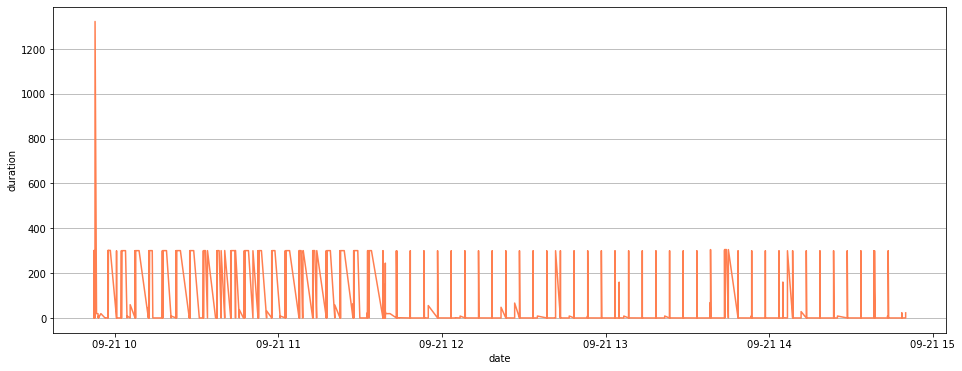

In [30]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')

### Number of bytes against time for 192.168.2.3

Text(0, 0.5, 'Number of bytes')

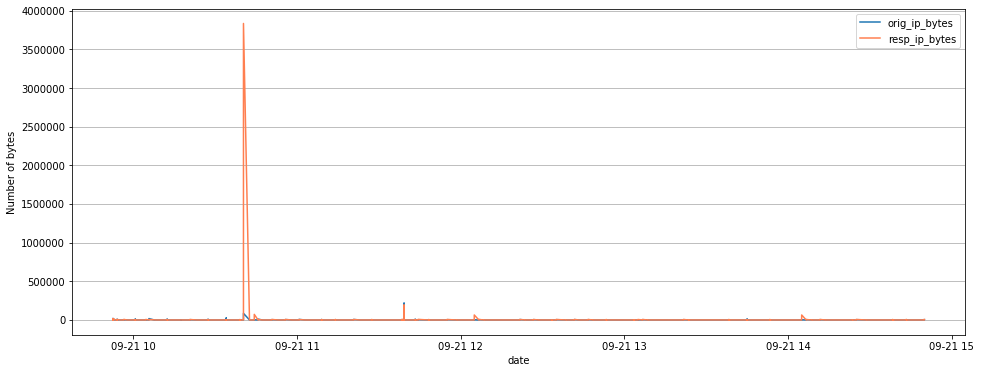

In [36]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=amazon_echo_ip, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=amazon_echo_ip, label='resp_ip_bytes', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of packets against time for 192.168.2.3

Text(0, 0.5, 'Number of packets')

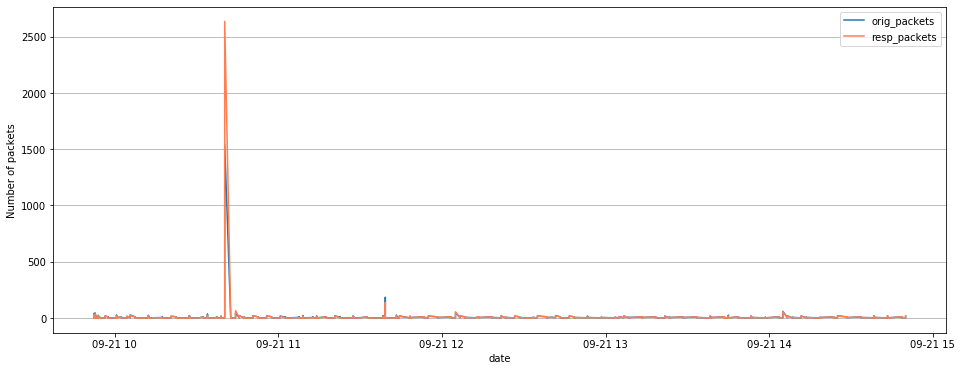

In [37]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=amazon_echo_ip, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=amazon_echo_ip, label='resp_packets', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's Packets/sec against Bytes/sec for 192.168.2.3

Text(0, 0.5, 'Originating Packets / sec')

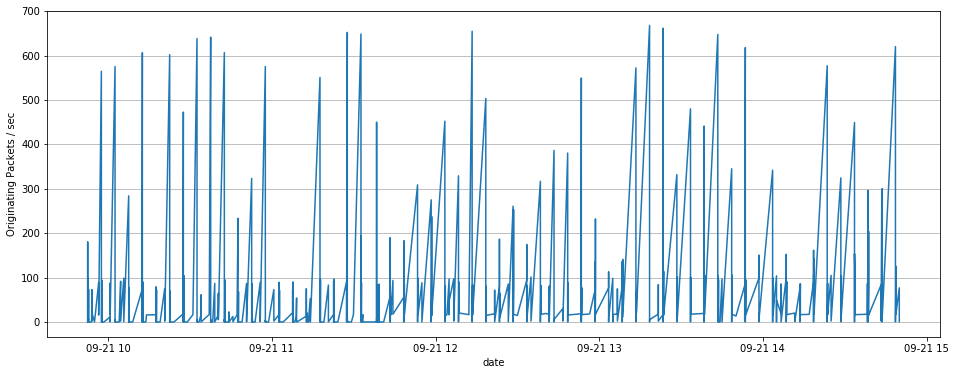

In [38]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=amazon_echo_ip)
plt.grid(axis='y')
plt.ylabel("Originating Packets / sec")

Text(0, 0.5, 'Originating Bytes / sec')

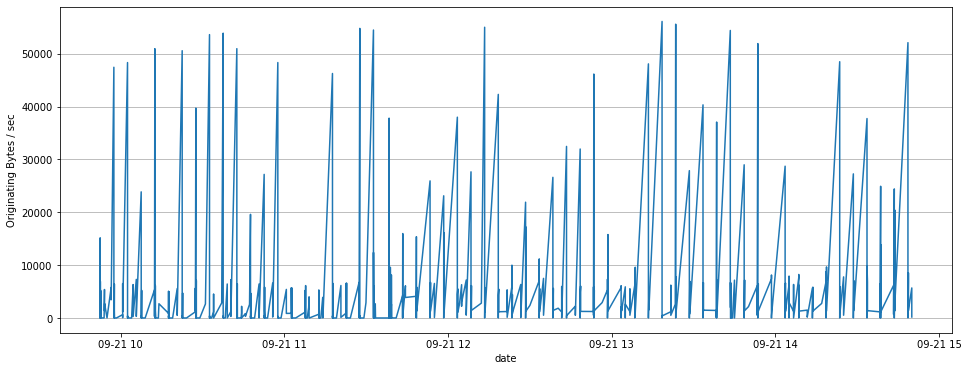

In [39]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=amazon_echo_ip)
plt.grid(axis='y')
plt.ylabel("Originating Bytes / sec")

### Responder's Packets/s against Bytes/sec for 192.168.2.3

Text(0, 0.5, "Responder's Packets / sec")

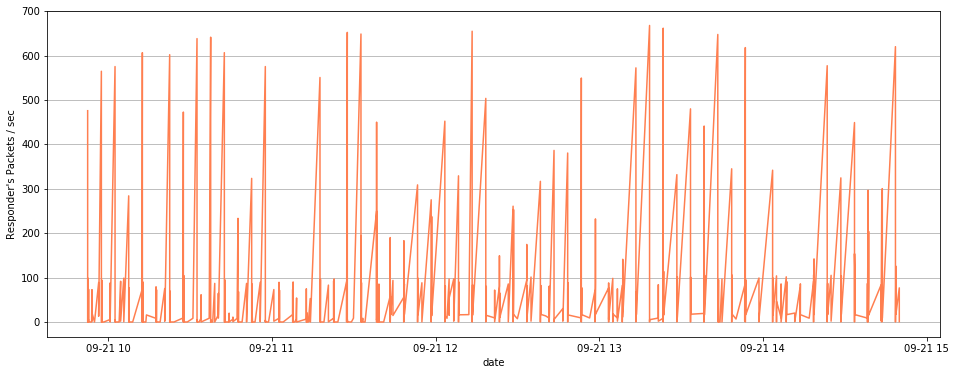

In [40]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_packets_per_s", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Packets / sec")

Text(0, 0.5, "Responder's Bytes / sec")

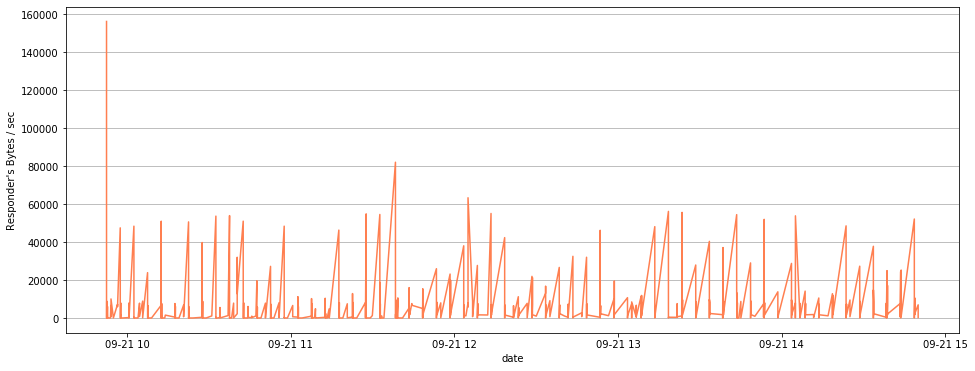

In [41]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_bytes_per_s", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Bytes / sec")

### Difference between sent and received packets

Text(0, 0.5, "Difference between originator's and responder's packets")

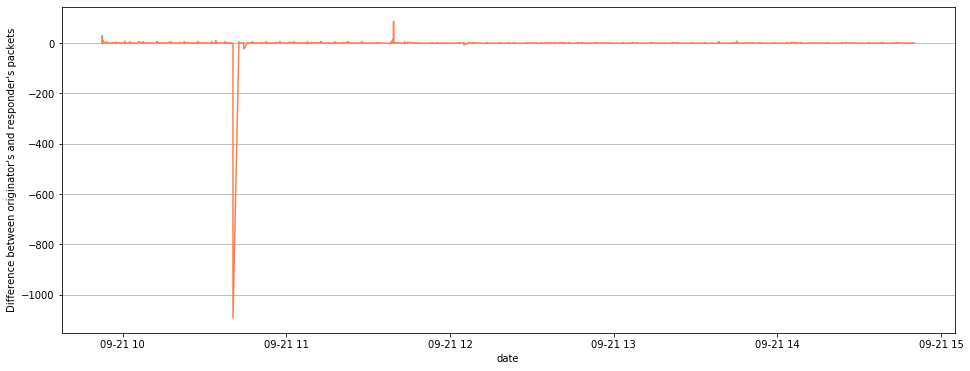

In [42]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_diff", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

### Difference between sent and received bytes

Text(0, 0.5, "Difference between originator's and responder's bytes")

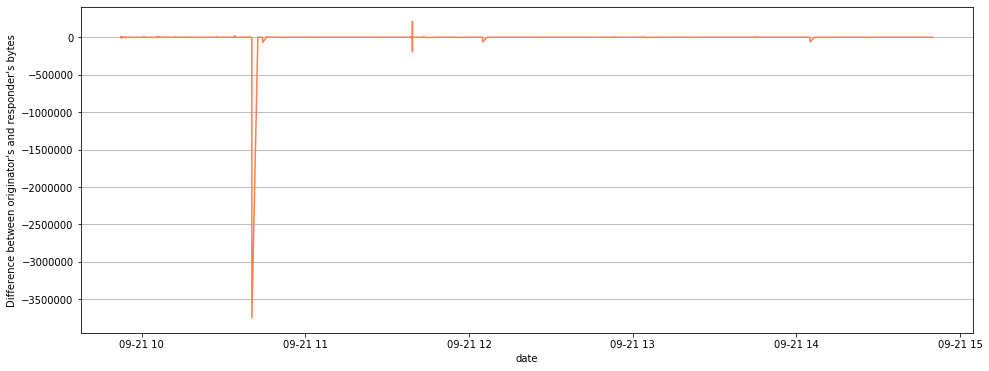

In [43]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_diff", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

### Difference between sent and received rates

Text(0, 0.5, "Difference between originator's and responder's packets/s")

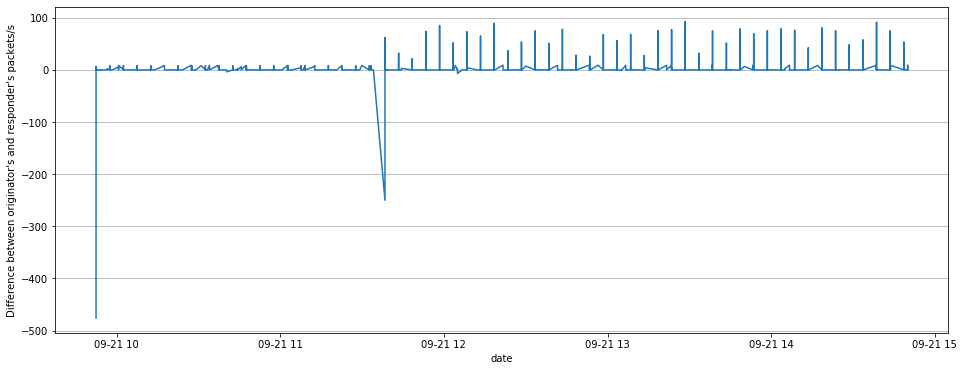

In [44]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_per_s_diff", data=amazon_echo_ip)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets/s")

Text(0, 0.5, "Difference between originator's and responder's bytes/s")

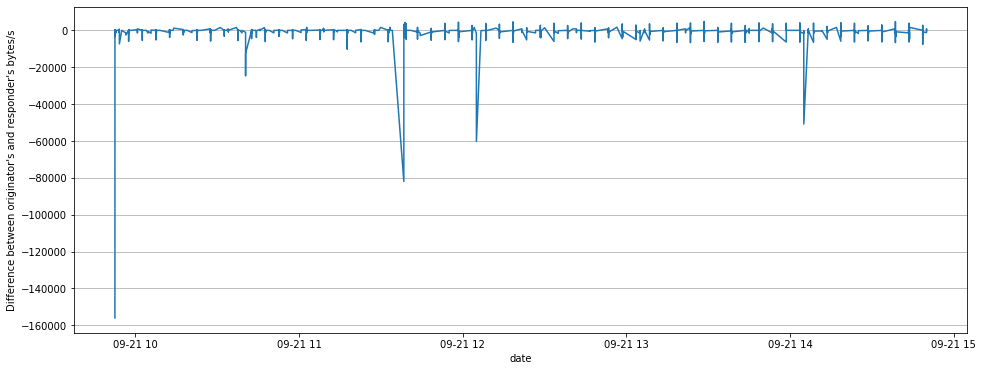

In [45]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_per_s_diff", data=amazon_echo_ip)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes/s")

### Protocol type distribution

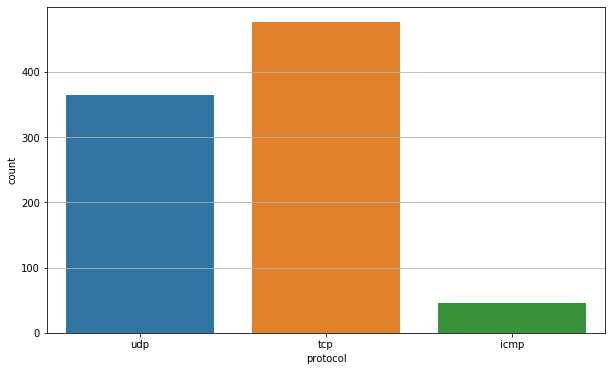

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=amazon_echo_ip)
plt.grid(axis='y')

### Packets transferred per protocol

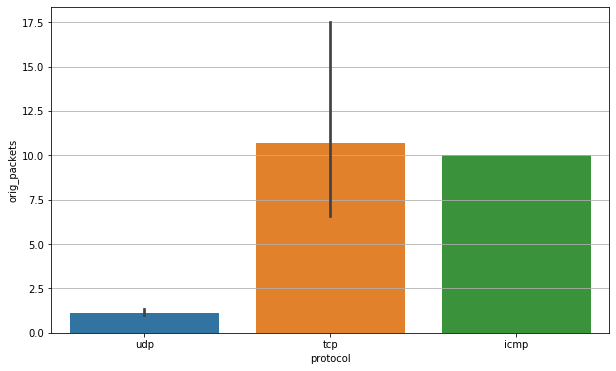

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=amazon_echo_ip)
plt.grid(axis='y')

### Packets received per protocol 

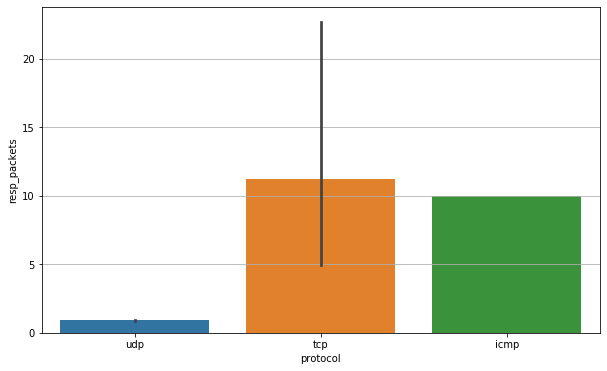

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=amazon_echo_ip)
plt.grid(axis='y')

### Bytes transferred per protocol

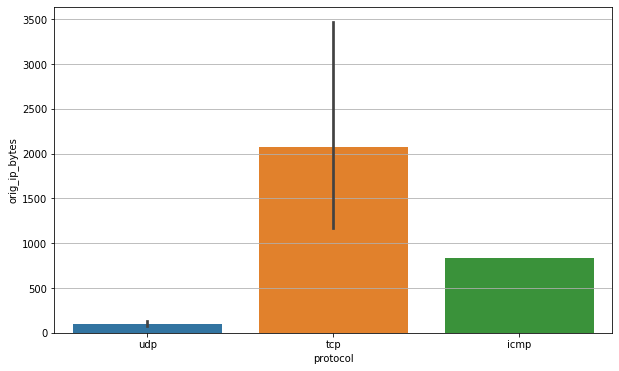

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=amazon_echo_ip)
plt.grid(axis='y')

### Bytes received per protocol

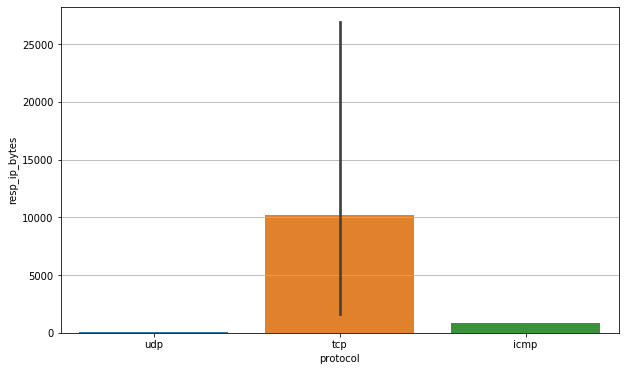

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=amazon_echo_ip)
plt.grid(axis='y')

### Duration per protocol

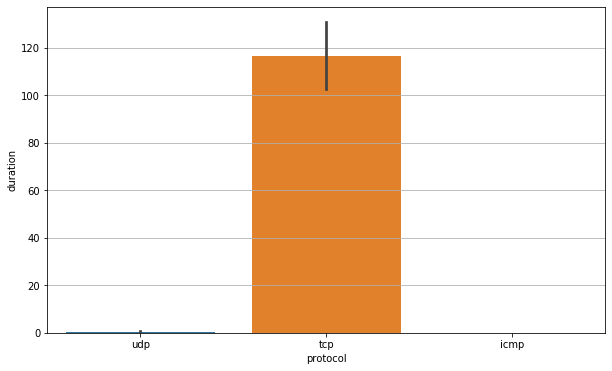

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=amazon_echo_ip)
plt.grid(axis='y')

## Connection level analysis

### Packets and bytes statistics per connection

In [54]:
amazon_grouped_connection_pb = amazon_echo.groupby(['src_ip', 'dst_ip']).agg({'orig_packets': ['count', 'mean', 'median', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'median', 'max', 'min', 'std'], 'resp_packets': ['mean', 'median', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'median', 'max', 'min', 'std']})
amazon_grouped_connection_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_median', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_bytes_mean', 'orig_bytes_median', 'orig_bytes_max', 'orig_bytes_min', 'orig_bytes_std', 'resp_packets_mean', 'resp_packets_median', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_bytes_mean', 'resp_bytes_median', 'resp_bytes_max', 'resp_bytes_min', 'resp_bytes_std']
amazon_grouped_connection_pb = amazon_grouped_connection_pb.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_connection_pb

,src_ip,dst_ip,count,orig_packets_mean,orig_packets_median,orig_packets_max,orig_packets_min,orig_packets_std,orig_bytes_mean,orig_bytes_median,...,resp_packets_mean,resp_packets_median,resp_packets_max,resp_packets_min,resp_packets_std,resp_bytes_mean,resp_bytes_median,resp_bytes_max,resp_bytes_min,resp_bytes_std
0,192.168.2.3,192.168.2.1,363,2.482094,1.0,10,0,3.350861,196.702479,71.0,...,2.493113,1.0,10,1,3.345952,230.449036,96.0,840,76,275.622459
1,0.0.0.0,255.255.255.255,153,10.058824,10.0,22,2,1.204352,3299.333333,3280.0,...,0.000000,0.0,0,0,0.000000,0.000000,0.0,0,0,0.000000
2,192.168.2.3,72.21.192.213,64,1.000000,1.0,1,1,0.000000,76.000000,76.0,...,0.000000,0.0,0,0,0.000000,0.000000,0.0,0,0,0.000000
3,192.168.2.3,93.184.216.34,63,4.015873,4.0,5,4,0.125988,216.825397,216.0,...,2.063492,2.0,4,2,0.304431,115.492063,112.0,228,112,17.084112
4,192.168.2.3,207.171.178.6,56,1.000000,1.0,1,1,0.000000,76.000000,76.0,...,0.517857,1.0,1,0,0.504203,39.357143,76.0,76,0,38.319437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,192.168.2.3,52.216.233.179,1,59.000000,59.0,59,59,NaN,3505.000000,3505.0,...,56.000000,56.0,56,56,NaN,64465.000000,64465.0,64465,64465,NaN
164,192.168.2.3,52.216.230.235,1,8.000000,8.0,8,8,NaN,632.000000,632.0,...,6.000000,6.0,6,6,NaN,1027.000000,1027.0,1027,1027,NaN
165,192.168.2.3,52.216.227.0,1,8.000000,8.0,8,8,NaN,632.000000,632.0,...,6.000000,6.0,6,6,NaN,1027.000000,1027.0,1027,1027,NaN
166,192.168.2.3,52.216.18.80,1,8.000000,8.0,8,8,NaN,632.000000,632.0,...,6.000000,6.0,6,6,NaN,1027.000000,1027.0,1027,1027,NaN


### Duration statistics per connection

In [56]:
amazon_grouped_connection_time = amazon_echo.groupby(['src_ip', 'dst_ip']).agg({'duration': ['count', 'mean', 'median', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().median(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
amazon_grouped_connection_time.columns = ['count', 'duration_mean', 'duration_median', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'median_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
amazon_grouped_connection_time = amazon_grouped_connection_time.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_connection_time

,src_ip,dst_ip,count,duration_mean,duration_median,duration_max,duration_min,duration_std,mean_time_diff,median_time_diff,max_time_diff,min_time_diff,std_time_diff
0,192.168.2.3,192.168.2.1,363,0.017241,0.012469,0.189103,0.000468,0.017545,00:00:49.313843,00:00:00.449588,00:05:32.742849,00:00:00.000004,00:01:30.387201
1,0.0.0.0,255.255.255.255,153,60.147332,59.430869,188.262180,8.322388,11.623248,00:02:08.403643,00:02:07.893740,00:04:16.724261,00:01:16.533275,00:00:11.309331
2,192.168.2.3,72.21.192.213,64,0.000010,0.000010,0.000010,0.000010,0.000000,00:04:37.243159,00:00:00.348641,01:05:06.474334,00:00:00.000002,00:09:49.376894
3,192.168.2.3,93.184.216.34,63,0.251968,0.241904,0.364352,0.234004,0.027272,00:01:36.946401,00:00:00.132071,00:05:00.353352,00:00:00.119066,00:02:21.440583
4,192.168.2.3,207.171.178.6,56,0.191459,0.191459,0.257034,0.179226,0.009775,00:05:12.083925,00:00:00.029140,01:05:46.226729,00:00:00.000007,00:11:27.884110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,192.168.2.3,52.216.233.179,1,1.199366,1.199366,1.199366,1.199366,NaN,NaT,NaT,NaT,NaT,NaT
164,192.168.2.3,52.216.230.235,1,300.124925,300.124925,300.124925,300.124925,NaN,NaT,NaT,NaT,NaT,NaT
165,192.168.2.3,52.216.227.0,1,300.176227,300.176227,300.176227,300.176227,NaN,NaT,NaT,NaT,NaT,NaT
166,192.168.2.3,52.216.18.80,1,300.162899,300.162899,300.162899,300.162899,NaN,NaT,NaT,NaT,NaT,NaT


### Source and destination ports, as well as protocol statistics

In [70]:
amazon_grouped_connection_net = amazon_echo.groupby(['src_ip', 'dst_ip']).agg({'src_port': ['count', 'nunique'], 'dst_port': 'nunique', 'protocol': 'nunique'})
amazon_grouped_connection_net.columns = ['count', 'number of unique source ports', 'number of unique destination ports', 'number of unique protocols']
amazon_grouped_connection_net = amazon_grouped_connection_net.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_connection_net

,src_ip,dst_ip,count,number of unique source ports,number of unique destination ports,number of unique protocols
0,192.168.2.3,192.168.2.1,363,302,3,2
1,0.0.0.0,255.255.255.255,153,1,1,1
2,192.168.2.3,72.21.192.213,64,64,1,1
3,192.168.2.3,93.184.216.34,63,63,1,1
4,192.168.2.3,207.171.178.6,56,56,1,1
...,...,...,...,...,...,...
163,192.168.2.3,52.216.233.179,1,1,1,1
164,192.168.2.3,52.216.230.235,1,1,1,1
165,192.168.2.3,52.216.227.0,1,1,1,1
166,192.168.2.3,52.216.18.80,1,1,1,1


### Now let's keep only the ip pair with the greatest number of flows

In [58]:
amazon_echo_conn = amazon_echo.loc[(amazon_echo['src_ip'] == '192.168.2.3') & (amazon_echo['dst_ip'] == '192.168.2.1')].reset_index(drop=True)
amazon_echo_conn['orig_packets_per_s'] = amazon_echo_conn['orig_packets'] / amazon_echo_conn['duration']
amazon_echo_conn['resp_packets_per_s'] = amazon_echo_conn['resp_packets'] / amazon_echo_conn['duration']
amazon_echo_conn['orig_bytes_per_s'] = amazon_echo_conn['orig_ip_bytes'] / amazon_echo_conn['duration']
amazon_echo_conn['resp_bytes_per_s'] = amazon_echo_conn['resp_ip_bytes'] / amazon_echo_conn['duration']
amazon_echo_conn['packets_diff'] = amazon_echo_conn['orig_packets'] - amazon_echo_conn['resp_packets']
amazon_echo_conn['bytes_diff'] = amazon_echo_conn['orig_ip_bytes'] - amazon_echo_conn['resp_ip_bytes']
amazon_echo_conn['packets_per_s_diff'] = amazon_echo_conn['orig_packets_per_s'] - amazon_echo_conn['resp_packets_per_s']
amazon_echo_conn['bytes_per_s_diff'] = amazon_echo_conn['orig_bytes_per_s'] - amazon_echo_conn['resp_bytes_per_s']
amazon_echo_conn

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,orig_packets,orig_ip_bytes,...,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-09-21 09:52:28.881175041,192.168.2.3,68,192.168.2.1,67,udp,0.004204,SHR,0,0,...,0,4,0.000000,475.737393,0.000000,156041.864891,-2,-656,-475.737393,-156041.864891
1,2018-09-21 09:52:29.331990957,192.168.2.3,59744,192.168.2.1,53,udp,0.011518,SF,1,71,...,0,1,86.820629,86.820629,6164.264629,12068.067373,0,-68,0.000000,-5903.802744
2,2018-09-21 09:52:29.337398052,192.168.2.3,55971,192.168.2.1,53,udp,0.015621,SF,1,68,...,0,1,64.016388,64.016388,4353.114397,5377.376608,0,-16,0.000000,-1024.262211
3,2018-09-21 09:52:29.337702036,192.168.2.3,41548,192.168.2.1,53,udp,0.015581,SF,1,68,...,0,1,64.180733,64.180733,4364.289840,8471.856749,0,-64,0.000000,-4107.566908
4,2018-09-21 09:52:29.487076044,192.168.2.3,8,192.168.2.1,0,icmp,0.055415,OTH,10,840,...,2,3,180.456555,180.456555,15158.350627,15158.350627,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2018-09-21 14:48:36.310306072,192.168.2.3,28097,192.168.2.1,53,udp,0.010643,SF,1,64,...,0,1,93.958470,93.958470,6013.342103,9020.013154,0,-32,0.000000,-3006.671051
359,2018-09-21 14:48:36.316819906,192.168.2.3,5773,192.168.2.1,53,udp,0.004200,SF,1,64,...,0,1,238.095238,238.095238,15238.095238,22857.142857,0,-32,0.000000,-7619.047619
360,2018-09-21 14:48:46.324502945,192.168.2.3,17860,192.168.2.1,53,udp,0.009876,SF,1,68,...,0,1,101.255569,101.255569,6885.378696,8505.467801,0,-16,0.000000,-1620.089105
361,2018-09-21 14:48:46.326494932,192.168.2.3,30996,192.168.2.1,53,udp,0.007966,SF,1,68,...,0,1,125.533517,125.533517,8536.279187,10544.815466,0,-16,0.000000,-2008.536279


In [74]:
amazon_echo_conn.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s
count,363.000000,363.000000,363.000000,363.0,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,27691.652893,44.316804,0.017241,0.0,2.482094,196.702479,2.493113,230.449036,0.330579,1.347107,189.260900,191.259832,14315.212904,18032.624129
std,20857.213300,19.775157,0.017545,0.0,3.350861,286.732477,3.345952,275.622459,0.743908,0.769344,285.585295,285.646484,21346.724059,25360.649673
min,8.000000,0.000000,0.000468,0.0,0.000000,0.000000,1.000000,76.000000,0.000000,1.000000,0.000000,5.288123,0.000000,428.337996
25%,6941.000000,53.000000,0.010719,0.0,1.000000,68.000000,1.000000,84.000000,0.000000,1.000000,72.801407,73.180083,5092.566522,7006.544419
50%,27354.000000,53.000000,0.012469,0.0,1.000000,71.000000,1.000000,96.000000,0.000000,1.000000,88.526912,88.825724,6164.264629,8822.788001
75%,46369.500000,53.000000,0.016418,0.0,1.000000,75.000000,1.000000,139.000000,0.000000,1.000000,104.118844,105.030985,7497.556243,13731.789680
max,64769.000000,67.000000,0.189103,0.0,10.000000,840.000000,10.000000,840.000000,2.000000,4.000000,2136.752137,2136.752137,145299.145299,199584.199584


### Remove the outliers

In [60]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
amazon_echo_conn = amazon_echo_conn[(np.abs(stats.zscore(amazon_echo_conn[continuous])) < 3).all(axis=1)]
amazon_echo_conn.describe()

,src_port,dst_port,duration,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.0,344.000000,344.0,344.000000
mean,27858.177326,44.218023,0.015677,2.491279,197.514535,2.491279,228.427326,0.331395,1.331395,157.298154,157.298154,12151.056432,14693.042453,0.0,-30.912791,0.0,-2541.986021
std,20720.003634,19.734583,0.009399,3.351156,286.769490,3.351156,273.928893,0.744701,0.744701,181.111683,181.111683,15384.372934,14856.181385,0.0,25.481794,0.0,2451.237618
min,8.000000,0.000000,0.001252,1.000000,60.000000,1.000000,76.000000,0.000000,1.000000,16.219285,16.219285,1200.227070,1657.196970,0.0,-107.000000,0.0,-25559.105431
25%,6949.500000,53.000000,0.010904,1.000000,68.000000,1.000000,84.000000,0.000000,1.000000,73.532246,73.532246,5195.557460,7153.795448,0.0,-64.000000,0.0,-4348.299664
50%,27970.500000,53.000000,0.012547,1.000000,71.000000,1.000000,96.000000,0.000000,1.000000,88.522994,88.522994,6153.691338,8719.060902,0.0,-16.000000,0.0,-1559.579180
75%,46344.250000,53.000000,0.016216,1.000000,75.000000,1.000000,139.000000,0.000000,1.000000,101.895303,101.895303,7407.226153,13306.878642,0.0,-16.000000,0.0,-1148.706573
max,64769.000000,53.000000,0.061655,10.000000,840.000000,10.000000,840.000000,2.000000,3.000000,888.178346,888.178346,74606.981082,76677.316294,0.0,0.000000,0.0,0.000000


### Duration against time for the 192.168.2.3 - 192.168.2.1 pair

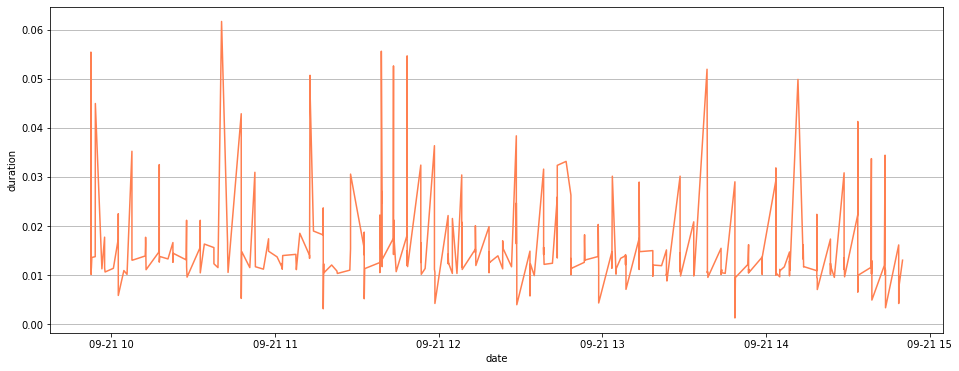

In [61]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')

### Number of bytes against time for the 192.168.2.3 - 192.168.2.1 pair

Text(0, 0.5, 'Number of bytes')

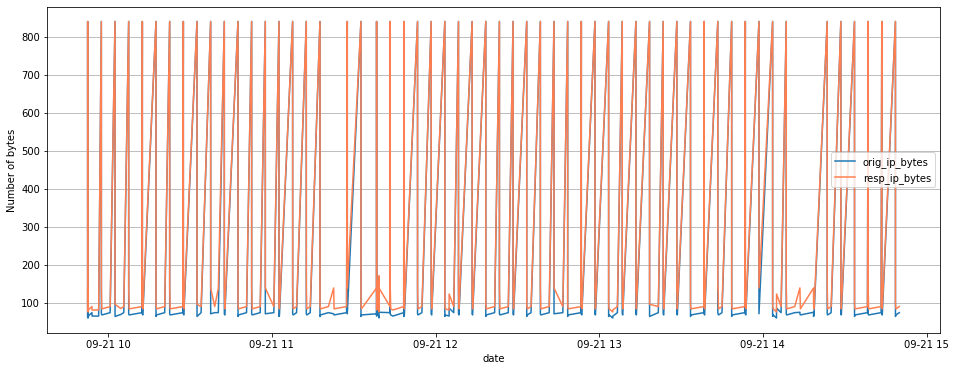

In [62]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=amazon_echo_conn, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=amazon_echo_conn, label='resp_ip_bytes', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of packets against time for the 192.168.2.3 - 192.168.2.1 pair

Text(0, 0.5, 'Number of packets')

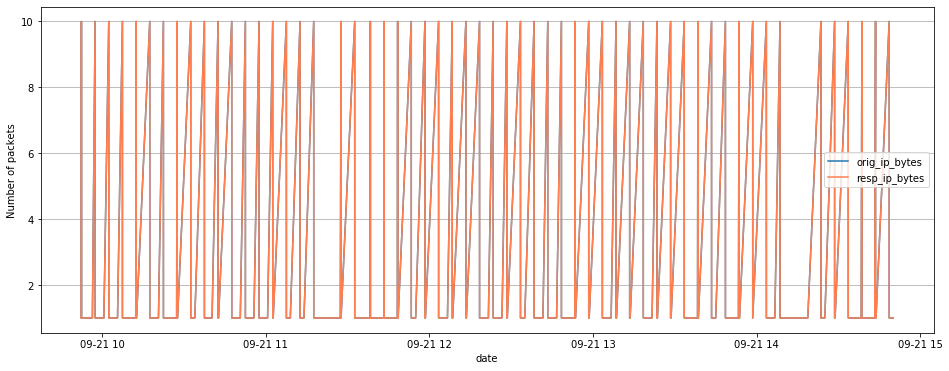

In [63]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=amazon_echo_conn, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_packets", data=amazon_echo_conn, label='resp_ip_bytes', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's packets/sec and bytes/sec for the 192.168.2.3 - 192.168.2.1 pair

Text(0, 0.5, 'Originating Packets / sec')

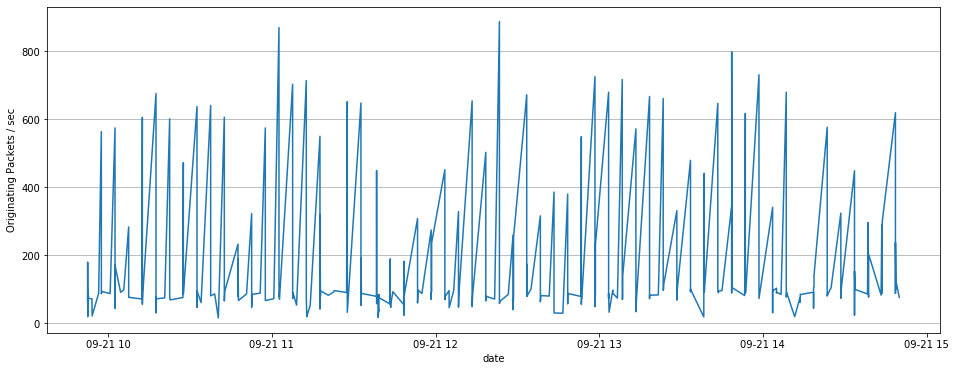

In [64]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=amazon_echo_conn)
plt.grid(axis='y')
plt.ylabel("Originating Packets / sec")

Text(0, 0.5, 'Originating Bytes / sec')

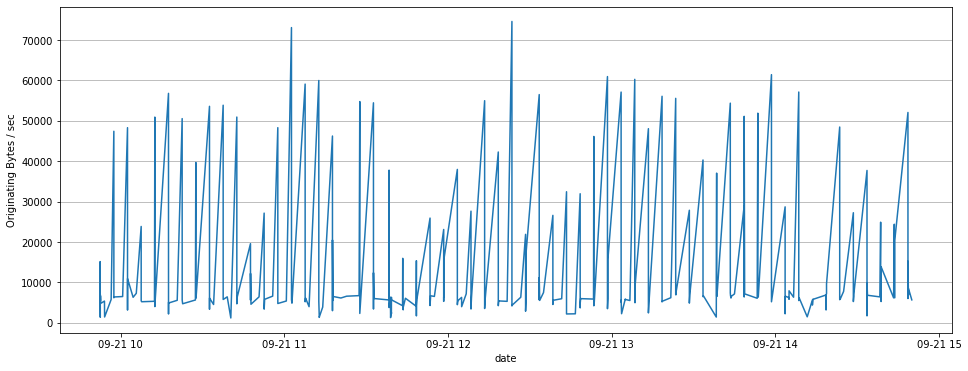

In [65]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=amazon_echo_conn)
plt.grid(axis='y')
plt.ylabel("Originating Bytes / sec")

### Responder's packets/sec and bytes/sec for the 192.168.2.3 - 192.168.2.1 pair

Text(0, 0.5, "Responder's Packets / sec")

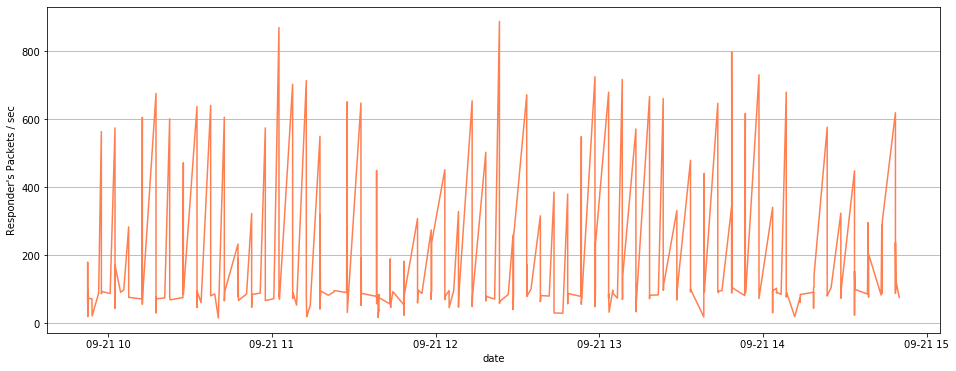

In [66]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_packets_per_s", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Packets / sec")

Text(0, 0.5, "Responder's Bytes / sec")

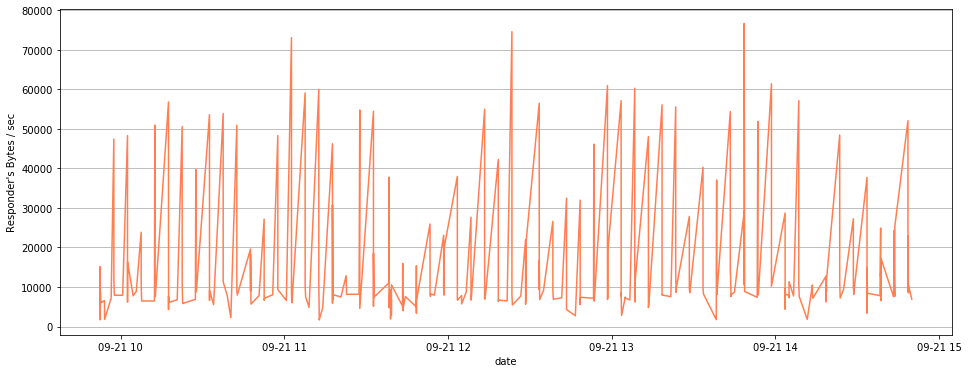

In [67]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_bytes_per_s", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Bytes / sec")

### Difference between originator's and responder's packets and bytes 

Text(0, 0.5, "Difference between originator's and responder's packets")

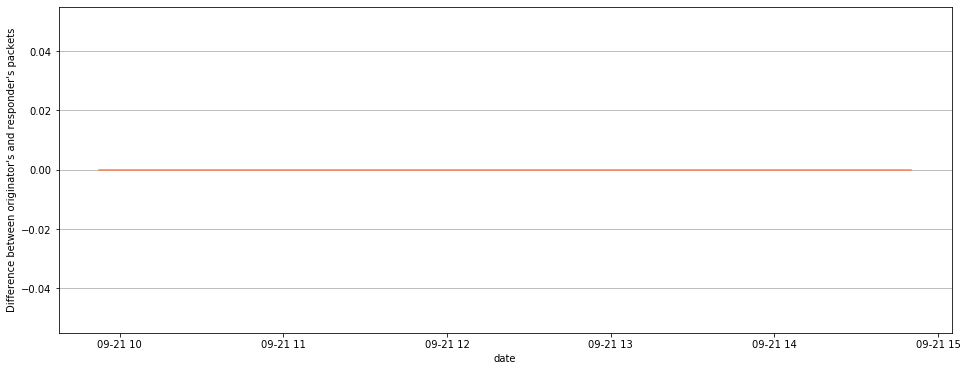

In [68]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_diff", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

Text(0, 0.5, "Difference between originator's and responder's bytes")

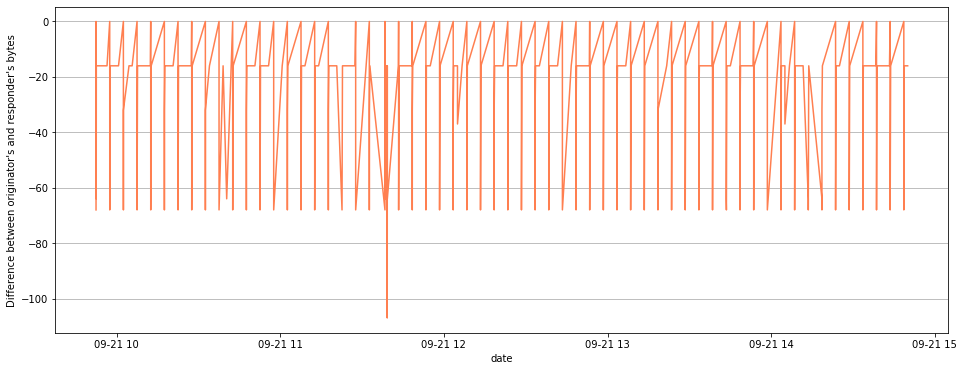

In [69]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_diff", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

### Difference between originator's and responder's packets and bytes rates

Text(0, 0.5, "Difference between originator's and responder's packets")

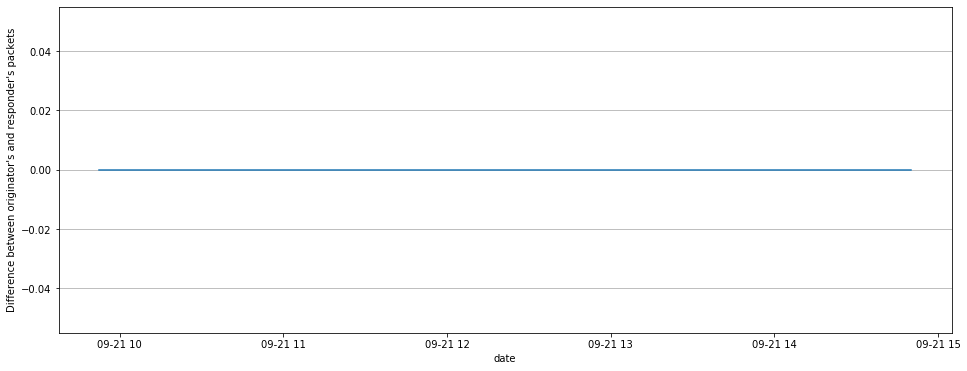

In [70]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_per_s_diff", data=amazon_echo_conn)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

Text(0, 0.5, "Difference between originator's and responder's bytes")

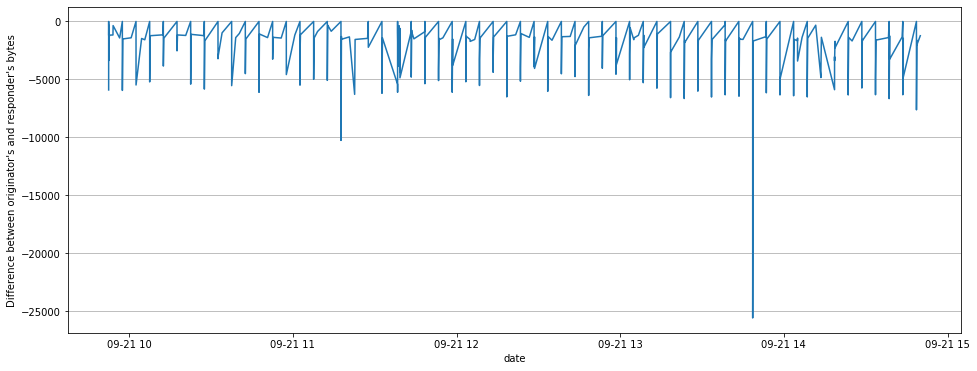

In [71]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_per_s_diff", data=amazon_echo_conn)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

### Protocol distribution

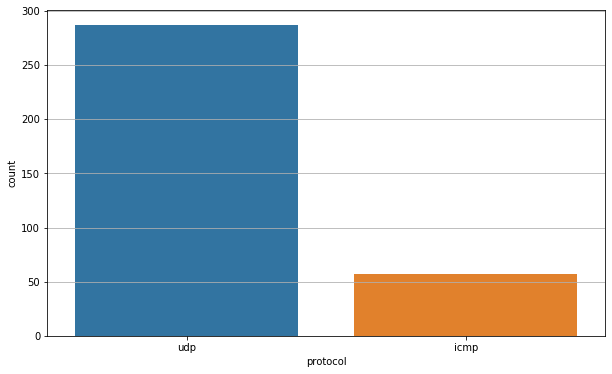

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=amazon_echo_conn)
plt.grid(axis='y')

### Packets transferred per protocol

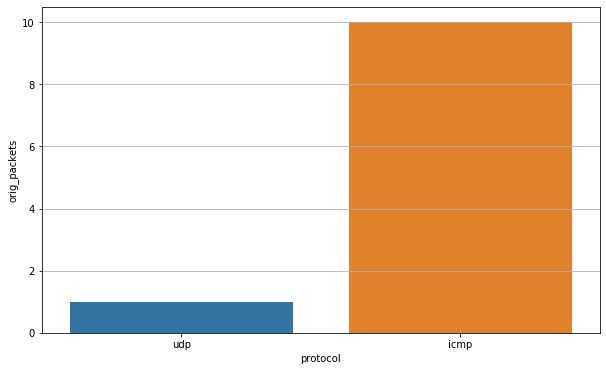

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=amazon_echo_conn)
plt.grid(axis='y')

### Packets received per protocol

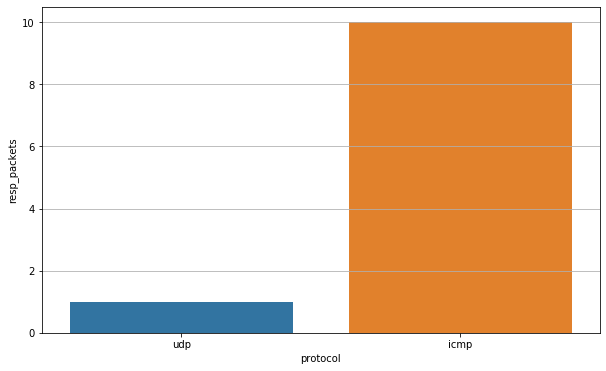

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=amazon_echo_conn)
plt.grid(axis='y')

### Bytes transferred per protocol

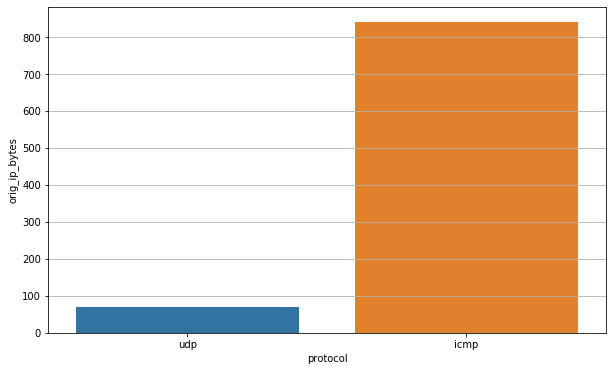

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=amazon_echo_conn)
plt.grid(axis='y')

### Bytes received per protocol

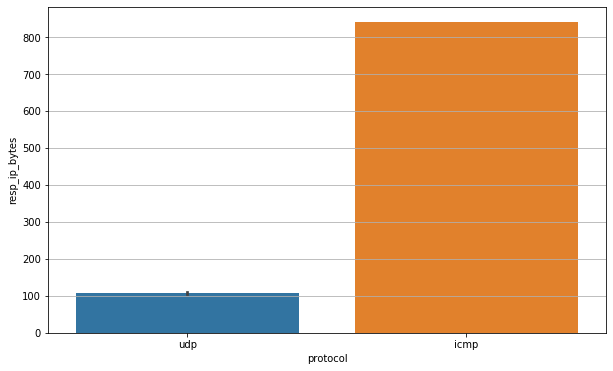

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=amazon_echo_conn)
plt.grid(axis='y')

### Duration of connection per protocol

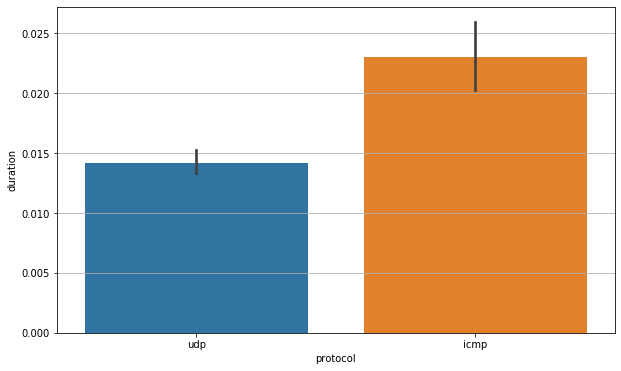

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=amazon_echo_conn)
plt.grid(axis='y')

## Phillips HUE

In [53]:
phillips_hue.head()

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num
0,2018-10-25 12:06:37.400158882,192.168.1.132,1900,239.255.255.250,1900,udp,160.367579,S0,0,24,8208,0,0,benign,missing,0,1
1,2018-10-25 12:06:38.477547884,192.168.1.132,37653,104.155.18.91,443,tcp,78840.329305,OTH,0,3291,157263,2667,129675,benign,missing,1,3
2,2018-10-25 12:08:22.538640022,192.168.1.132,58687,216.239.35.4,123,udp,0.114184,SF,0,1,76,1,76,benign,missing,0,0
3,2018-10-25 12:09:45.734088898,192.168.1.132,32893,216.239.35.8,123,udp,0.016986,SF,0,1,76,1,76,benign,missing,0,0
4,2018-10-25 12:10:18.379528046,192.168.1.132,1900,239.255.255.250,1900,udp,384.518261,S0,0,48,16416,0,0,benign,missing,0,1


In [54]:
phillips_hue.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,452.000000,452.000000,452.000000,452.000000,452.000000,4.520000e+02,452.000000,452.000000,452.000000,452.000000
mean,48306.522124,201.444690,347.392555,45.232301,29.610619,7.543912e+03,7.805310,581.851770,0.314159,0.042035
std,11877.479603,327.329725,4964.991365,440.060252,412.030448,1.309511e+05,125.368803,6097.843503,0.464694,0.241031
min,68.000000,53.000000,0.000479,0.000000,1.000000,6.200000e+01,0.000000,0.000000,0.000000,0.000000
25%,41905.000000,53.000000,0.007997,0.000000,1.000000,6.500000e+01,1.000000,76.000000,0.000000,0.000000
50%,52594.000000,80.000000,0.054824,0.000000,1.000000,7.600000e+01,1.000000,144.000000,0.000000,0.000000
75%,56663.250000,123.000000,0.114419,0.000000,4.000000,1.720000e+02,2.000000,325.000000,1.000000,0.000000
max,60977.000000,1900.000000,78840.329305,7363.000000,8124.000000,2.778408e+06,2667.000000,129675.000000,1.000000,3.000000


In [80]:
# drop non-informative features
phillips_hue.drop(columns=['label', 'detailed_label'], inplace=True)

## Host level analysis

In [59]:
phillips_hue['src_ip'].nunique()

1

In [81]:
# Since there is only one source IP in this dataset there is no need for further analysis
phillips_hue['orig_packets_per_s'] = phillips_hue['orig_packets'] / phillips_hue['duration']
phillips_hue['resp_packets_per_s'] = phillips_hue['resp_packets'] / phillips_hue['duration']
phillips_hue['orig_bytes_per_s'] = phillips_hue['orig_ip_bytes'] / phillips_hue['duration']
phillips_hue['resp_bytes_per_s'] = phillips_hue['resp_ip_bytes'] / phillips_hue['duration']
phillips_hue['missed_bytes_per_s'] = phillips_hue['missed_bytes'] / phillips_hue['duration']
phillips_hue['packets_diff'] = phillips_hue['orig_packets'] - phillips_hue['resp_packets']
phillips_hue['bytes_diff'] = phillips_hue['orig_ip_bytes'] - phillips_hue['resp_ip_bytes']
phillips_hue['packets_per_s_diff'] = phillips_hue['orig_packets_per_s'] - phillips_hue['resp_packets_per_s']
phillips_hue['bytes_per_s_diff'] = phillips_hue['orig_bytes_per_s'] - phillips_hue['resp_bytes_per_s']
phillips_hue

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,...,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,missed_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-10-25 12:06:37.400158882,192.168.1.132,1900,239.255.255.250,1900,udp,160.367579,S0,0,24,...,1,0.149656,0.000000,51.182415,0.000000,0.0,24,8208,0.149656,51.182415
1,2018-10-25 12:06:38.477547884,192.168.1.132,37653,104.155.18.91,443,tcp,78840.329305,OTH,0,3291,...,3,0.041743,0.033828,1.994702,1.644780,0.0,624,27588,0.007915,0.349922
2,2018-10-25 12:08:22.538640022,192.168.1.132,58687,216.239.35.4,123,udp,0.114184,SF,0,1,...,0,8.757794,8.757794,665.592377,665.592377,0.0,0,0,0.000000,0.000000
3,2018-10-25 12:09:45.734088898,192.168.1.132,32893,216.239.35.8,123,udp,0.016986,SF,0,1,...,0,58.872012,58.872012,4474.272931,4474.272931,0.0,0,0,0.000000,0.000000
4,2018-10-25 12:10:18.379528046,192.168.1.132,1900,239.255.255.250,1900,udp,384.518261,S0,0,48,...,1,0.124832,0.000000,42.692381,0.000000,0.0,48,16416,0.124832,42.692381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2018-10-26 09:37:31.702119112,192.168.1.132,55520,216.239.35.0,123,udp,0.109427,SF,0,1,...,0,9.138512,9.138512,694.526945,694.526945,0.0,0,0,0.000000,0.000000
448,2018-10-26 09:42:40.912616968,192.168.1.132,35983,216.239.35.4,123,udp,0.116680,SF,0,1,...,0,8.570449,8.570449,651.354131,651.354131,0.0,0,0,0.000000,0.000000
449,2018-10-26 09:47:22.580300093,192.168.1.132,43799,192.168.1.1,53,udp,0.066709,SF,0,1,...,0,14.990481,14.990481,929.409825,4871.906339,0.0,0,-263,0.000000,-3942.496515
450,2018-10-26 09:47:22.647506952,192.168.1.132,53722,2.16.60.82,443,tcp,0.011493,SF,0,4,...,0,348.037936,174.018968,14965.631254,8004.872531,0.0,2,80,174.018968,6960.758723


In [82]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
phillips_hue = phillips_hue[(np.abs(stats.zscore(phillips_hue[continuous])) < 3).all(axis=1)]
phillips_hue.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,missed_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.0,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,49581.480418,131.566580,0.091795,53.381201,2.279373,388.691906,1.971279,327.355091,0.281984,0.0,271.814182,245.626190,18616.690844,32081.644559,419.284414,0.308094,61.336815,26.187992,-13464.953715
std,8396.891919,130.891927,0.176659,477.698755,2.182215,875.129058,1.927131,412.012211,0.450554,0.0,550.511331,541.938744,35375.109770,68017.979728,3395.671976,0.818063,668.776420,67.890222,38483.353797
min,32812.000000,53.000000,0.000479,0.000000,1.000000,62.000000,1.000000,69.000000,0.000000,0.0,1.999805,0.666602,91.991046,30.663682,0.000000,-4.000000,-426.000000,-25.696702,-126835.781041
25%,42305.500000,53.000000,0.011494,0.000000,1.000000,65.000000,1.000000,76.000000,0.000000,0.0,8.964480,8.964480,665.563233,1613.802753,0.000000,0.000000,-263.000000,0.000000,-4647.976218
50%,52156.000000,80.000000,0.061951,0.000000,1.000000,76.000000,1.000000,152.000000,0.000000,0.0,28.587764,27.613630,1772.441395,5780.963731,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56694.500000,123.000000,0.114425,0.000000,4.000000,172.000000,2.000000,325.000000,1.000000,0.0,250.000000,174.011398,18352.728153,12529.365701,0.000000,0.000000,54.000000,0.000000,3479.168505
max,60977.000000,443.000000,3.000292,7363.000000,12.000000,10487.000000,12.000000,1831.000000,1.000000,0.0,2087.682672,2087.682672,144050.104384,257028.112450,47301.203890,6.000000,9818.000000,471.142521,40593.396234


### Duration against time for 192.168.1.132

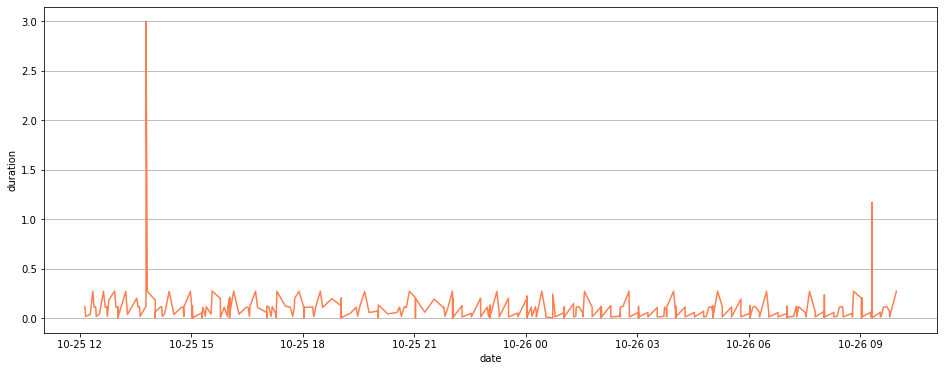

In [83]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=phillips_hue, color="coral")
plt.grid(axis='y')

### Number of bytes against time

Text(0, 0.5, 'Number of bytes')

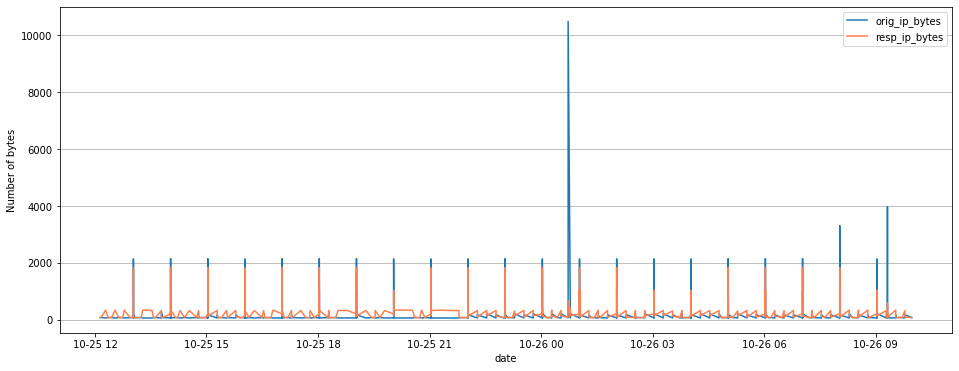

In [84]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=phillips_hue, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=phillips_hue, label='resp_ip_bytes', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

Text(0, 0.5, 'Missed Bytes')

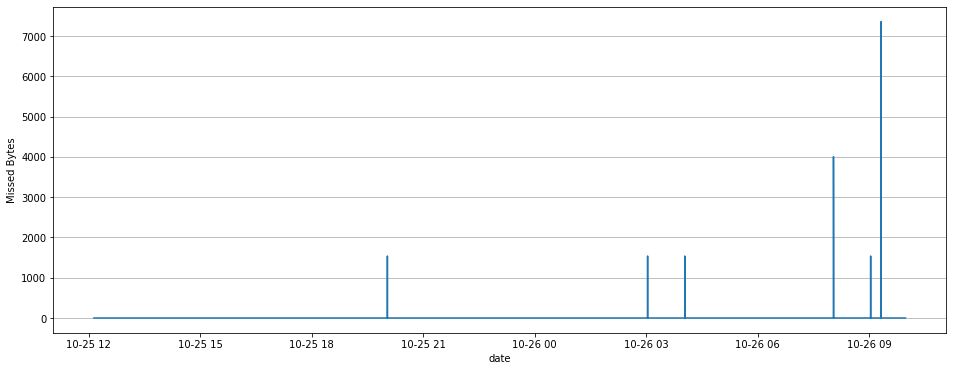

In [85]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="missed_bytes", data=phillips_hue)
plt.grid(axis='y')
plt.ylabel("Missed Bytes")

### Number of packets against time

Text(0, 0.5, 'Number of packets')

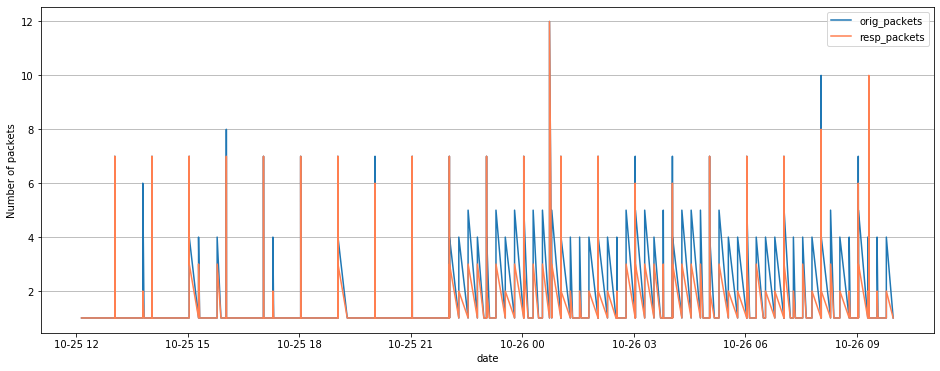

In [86]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=phillips_hue, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=phillips_hue, label='resp_packets', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's Packets/sec against Bytes/sec for 192.168.1.132

Text(0, 0.5, "Originator's Packets / sec")

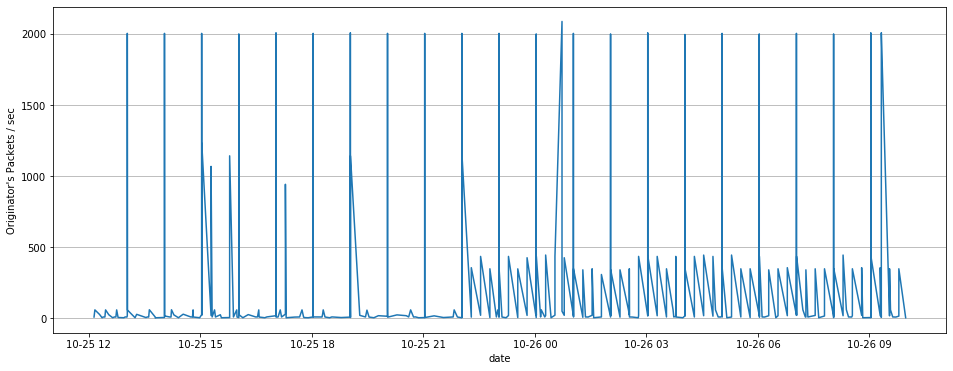

In [87]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=phillips_hue)
plt.grid(axis='y')
plt.ylabel("Originator's Packets / sec")

Text(0, 0.5, "Originator's Bytes / sec")

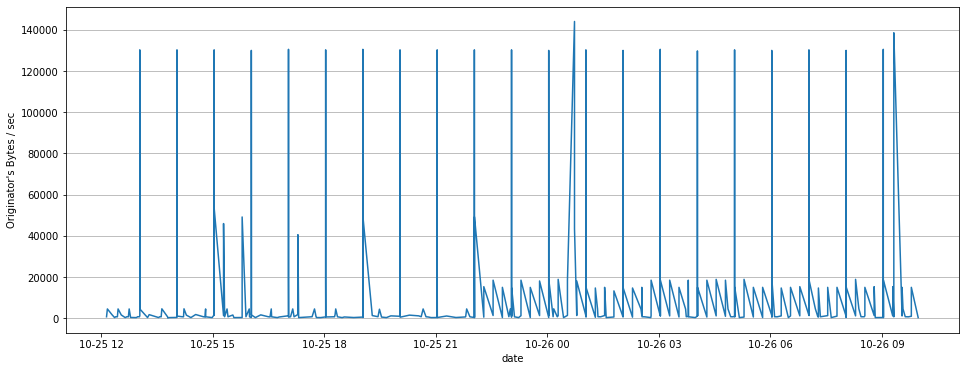

In [88]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=phillips_hue)
plt.grid(axis='y')
plt.ylabel("Originator's Bytes / sec")

### Responder's Packets/sec against Bytes/sec for 192.168.1.132

Text(0, 0.5, "Responder's Packets / sec")

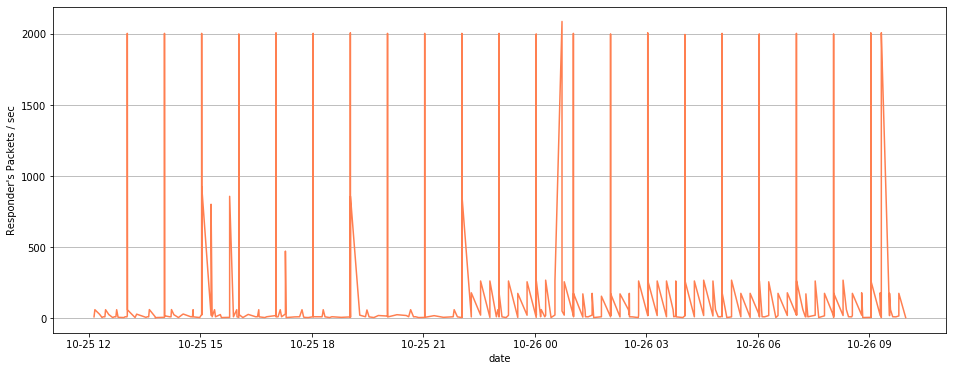

In [89]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_packets_per_s", data=phillips_hue, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Packets / sec")

Text(0, 0.5, "Responder's Packets / sec")

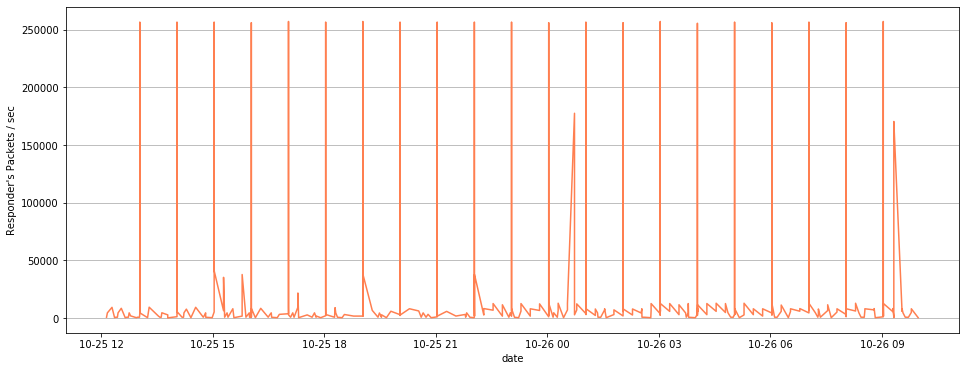

In [90]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_bytes_per_s", data=phillips_hue, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Packets / sec")

### Difference between sent and received packets 

Text(0, 0.5, "Difference between originator's and responder's packets")

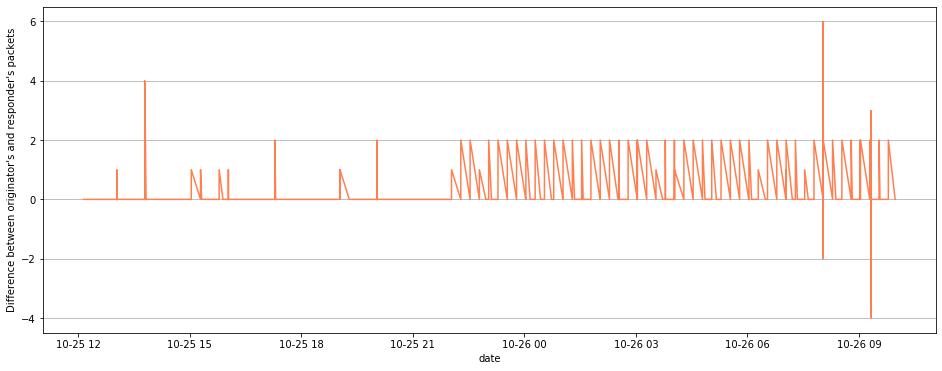

In [91]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_diff", data=phillips_hue, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

### Difference between sent and reveived bytes

Text(0, 0.5, "Difference between originator's and responder's bytes")

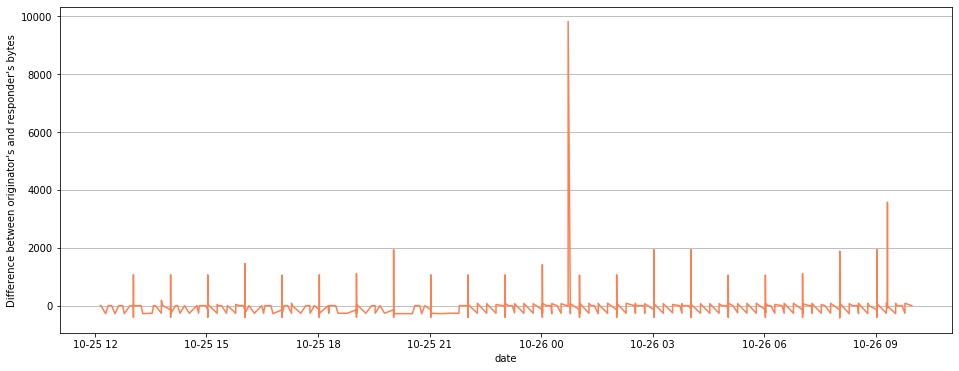

In [92]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_diff", data=phillips_hue, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

### Difference between packet rates

Text(0, 0.5, "Difference between originator's and responder's packets/s")

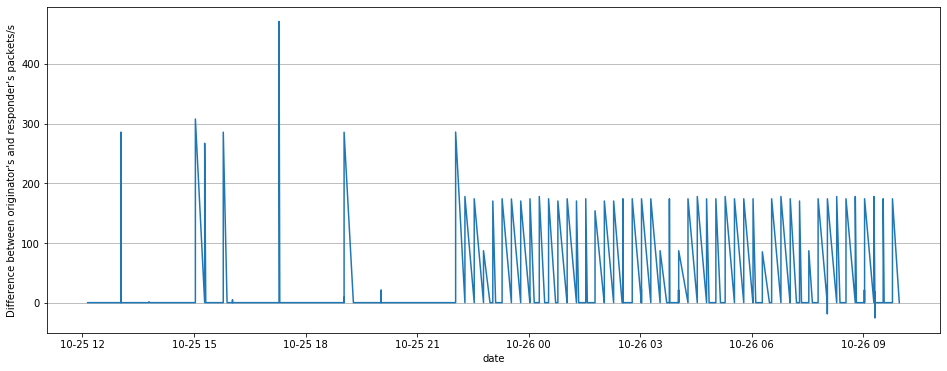

In [93]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_per_s_diff", data=phillips_hue)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets/s")

### Difference between bytes rates

Text(0, 0.5, "Difference between originator's and responder's bytes/s")

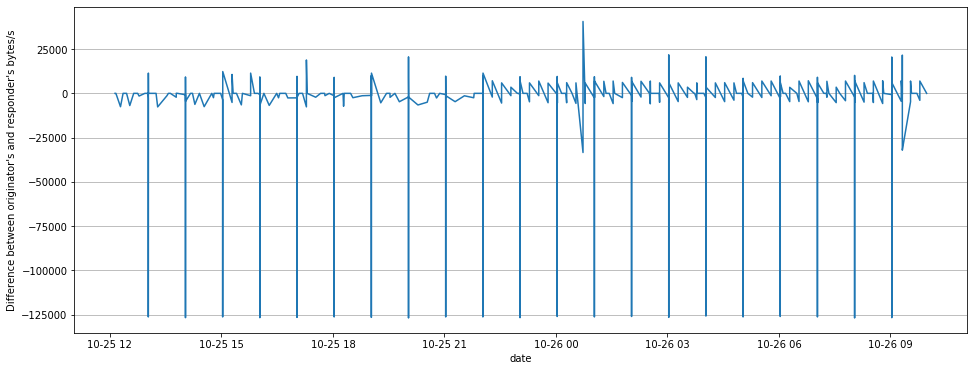

In [94]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_per_s_diff", data=phillips_hue)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes/s")

### Protocol type distribution

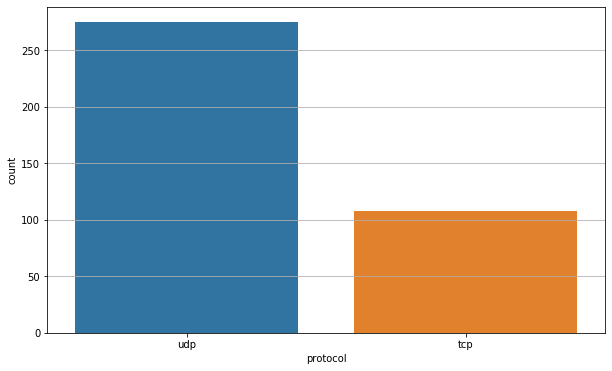

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=phillips_hue)
plt.grid(axis='y')

### Packets sent per protocol

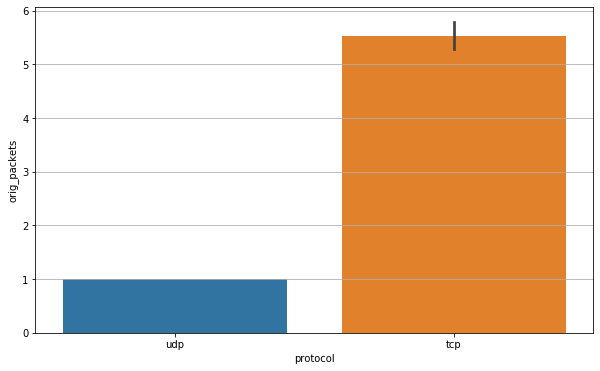

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=phillips_hue)
plt.grid(axis='y')

### Packets received per protocol

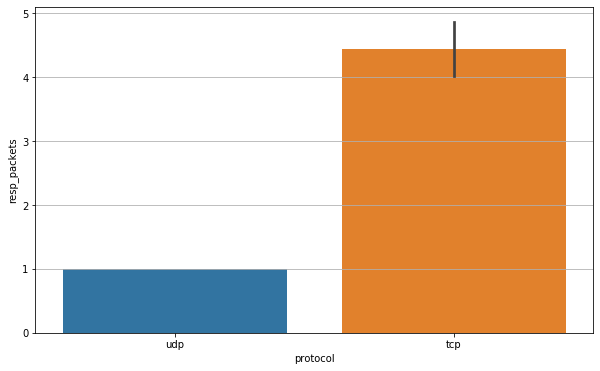

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=phillips_hue)
plt.grid(axis='y')

### Bytes sent per protocol

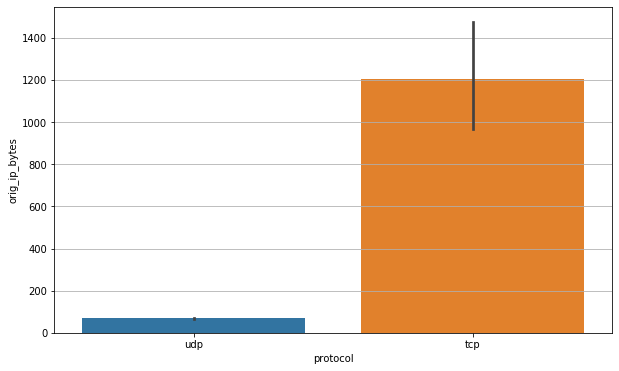

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=phillips_hue)
plt.grid(axis='y')

### Bytes received per protocol

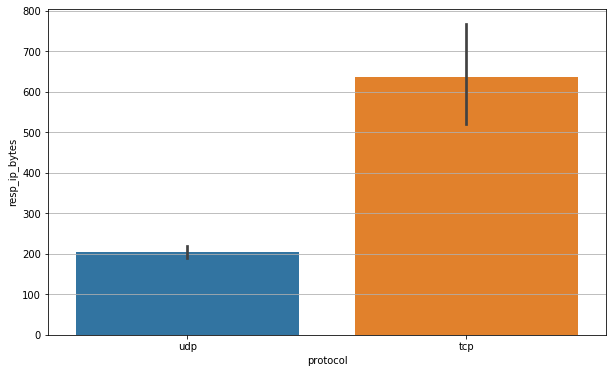

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=phillips_hue)
plt.grid(axis='y')

### Duration per protocol

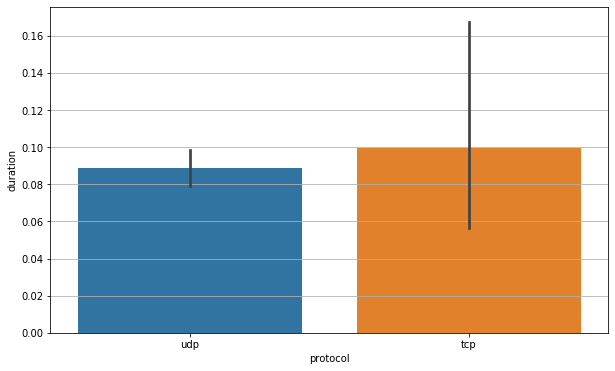

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=phillips_hue)
plt.grid(axis='y')

## Connection level analysis

In [101]:
phillips_grouped_connection_pb = phillips_hue.groupby(['src_ip', 'dst_ip']).agg({'orig_packets': ['count', 'mean', 'median', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'median', 'max', 'min', 'std'], 'resp_packets': ['mean', 'median', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'median', 'max', 'min', 'std']})
phillips_grouped_connection_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_median', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_bytes_mean', 'orig_bytes_median', 'orig_bytes_max', 'orig_bytes_min', 'orig_bytes_std', 'resp_packets_mean', 'resp_packets_median', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_bytes_mean', 'resp_bytes_median', 'resp_bytes_max', 'resp_bytes_min', 'resp_bytes_std']
phillips_grouped_connection_pb = phillips_grouped_connection_pb.sort_values(by=['count'], ascending=False).reset_index()
phillips_grouped_connection_pb

,src_ip,dst_ip,count,orig_packets_mean,orig_packets_median,orig_packets_max,orig_packets_min,orig_packets_std,orig_bytes_mean,orig_bytes_median,...,resp_packets_mean,resp_packets_median,resp_packets_max,resp_packets_min,resp_packets_std,resp_bytes_mean,resp_bytes_median,resp_bytes_max,resp_bytes_min,resp_bytes_std
0,192.168.1.132,192.168.1.1,172,1.000000,1.0,1,1,0.000000,63.918605,62.0,...,1.000000,1.0,1,1,0.000000,282.947674,325,500,69,110.668213
1,192.168.1.132,2.16.60.82,28,4.392857,4.0,6,4,0.566947,188.571429,172.0,...,2.535714,3.0,3,2,0.507875,117.285714,132,144,92,24.368859
2,192.168.1.132,2.16.60.139,26,4.384615,4.0,5,4,0.496139,187.384615,172.0,...,2.576923,3.0,3,2,0.503831,119.692308,132,144,92,24.577663
3,192.168.1.132,216.239.35.12,26,1.000000,1.0,1,1,0.000000,76.000000,76.0,...,1.000000,1.0,1,1,0.000000,76.000000,76,76,76,0.000000
4,192.168.1.132,216.239.35.4,26,1.000000,1.0,1,1,0.000000,76.000000,76.0,...,1.000000,1.0,1,1,0.000000,76.000000,76,76,76,0.000000
5,192.168.1.132,216.239.35.8,26,1.000000,1.0,1,1,0.000000,76.000000,76.0,...,1.000000,1.0,1,1,0.000000,76.000000,76,76,76,0.000000
6,192.168.1.132,216.239.35.0,25,1.000000,1.0,1,1,0.000000,76.000000,76.0,...,1.000000,1.0,1,1,0.000000,76.000000,76,76,76,0.000000
7,192.168.1.132,52.215.95.120,22,6.454545,6.0,7,6,0.509647,2086.727273,2099.0,...,6.181818,6.0,8,5,0.732664,1107.681818,1043,1831,204,493.046157
8,192.168.1.132,52.209.221.67,21,6.619048,7.0,7,6,0.497613,2126.571429,2139.0,...,6.523810,7.0,7,5,0.601585,1448.761905,1823,1831,204,480.117892
9,192.168.1.132,130.211.67.12,7,7.857143,7.0,12,6,1.951800,3291.714286,1887.0,...,7.428571,7.0,12,4,2.760262,490.000000,469,669,354,107.805380


### Now let's keep the ip pair with the most flows

In [117]:
phillips_hue_conn = phillips_hue.loc[(phillips_hue['src_ip'] == '192.168.1.132') & (phillips_hue['dst_ip'] == '192.168.1.1')].reset_index(drop=True)
phillips_hue_conn['orig_packets_per_s'] = phillips_hue_conn['orig_packets'] / phillips_hue_conn['duration']
phillips_hue_conn['resp_packets_per_s'] = phillips_hue_conn['resp_packets'] / phillips_hue_conn['duration']
phillips_hue_conn['orig_bytes_per_s'] = phillips_hue_conn['orig_ip_bytes'] / phillips_hue_conn['duration']
phillips_hue_conn['resp_bytes_per_s'] = phillips_hue_conn['resp_ip_bytes'] / phillips_hue_conn['duration']
phillips_hue_conn['packets_diff'] = phillips_hue_conn['orig_packets'] - phillips_hue_conn['resp_packets']
phillips_hue_conn['bytes_diff'] = phillips_hue_conn['orig_ip_bytes'] - phillips_hue_conn['resp_ip_bytes']
phillips_hue_conn['packets_per_s_diff'] = phillips_hue_conn['orig_packets_per_s'] - phillips_hue_conn['resp_packets_per_s']
phillips_hue_conn['bytes_per_s_diff'] = phillips_hue_conn['orig_bytes_per_s'] - phillips_hue_conn['resp_bytes_per_s']
phillips_hue_conn

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,...,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,missed_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-10-25 12:17:11.265404939,192.168.1.132,52801,192.168.1.1,53,udp,0.036724,SF,0,1,...,0,27.230149,27.230149,1688.269252,9231.020586,0.0,0,-277,0.0,-7542.751334
1,2018-10-25 12:32:11.305747032,192.168.1.132,48230,192.168.1.1,53,udp,0.040227,SF,0,1,...,0,24.858926,24.858926,1541.253387,8427.175777,0.0,0,-277,0.0,-6885.922390
2,2018-10-25 12:47:11.350065947,192.168.1.132,34110,192.168.1.1,53,udp,0.183145,SF,0,1,...,0,5.460155,5.460155,338.529580,1850.992383,0.0,0,-277,0.0,-1512.462803
3,2018-10-25 13:02:04.797194958,192.168.1.132,40730,192.168.1.1,53,udp,0.050455,SF,0,1,...,0,19.819641,19.819641,1288.276682,4102.665742,0.0,0,-142,0.0,-2814.389060
4,2018-10-25 13:02:04.848149061,192.168.1.132,50152,192.168.1.1,53,udp,0.003998,SF,0,1,...,0,250.125063,250.125063,16258.129065,117558.779390,0.0,0,-405,0.0,-101300.650325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2018-10-26 09:19:07.360032082,192.168.1.132,44238,192.168.1.1,53,udp,0.000499,SF,0,1,...,0,2004.008016,2004.008016,138276.553106,170340.681363,0.0,0,-16,0.0,-32064.128257
168,2018-10-26 09:19:07.511194944,192.168.1.132,35692,192.168.1.1,53,udp,0.000500,SF,0,1,...,0,2000.000000,2000.000000,138000.000000,138000.000000,0.0,0,0,0.0,0.000000
169,2018-10-26 09:19:07.512195109,192.168.1.132,55713,192.168.1.1,53,udp,0.000500,SF,0,1,...,0,2000.000000,2000.000000,138000.000000,170000.000000,0.0,0,-16,0.0,-32000.000000
170,2018-10-26 09:32:22.514566898,192.168.1.132,38092,192.168.1.1,53,udp,0.058485,SF,0,1,...,0,17.098401,17.098401,1060.100881,5796.358041,0.0,0,-277,0.0,-4736.257160


In [115]:
phillips_hue_conn.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,missed_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,172.000000,172.0,172.000000,172.0,172.0,172.000000,172.0,172.000000,172.0,172.0,172.000000,172.000000,172.000000,172.000000,172.0,172.0,172.000000,172.0,172.000000
mean,47114.761628,53.0,0.065245,0.0,1.0,63.918605,1.0,282.947674,0.0,0.0,424.341657,424.341657,27970.352837,62702.832927,0.0,0.0,-219.029070,0.0,-34732.480090
std,7802.756523,0.0,0.064595,0.0,0.0,2.438555,0.0,110.668213,0.0,0.0,753.355886,753.355886,49785.858088,92424.072618,0.0,0.0,111.716769,0.0,49469.912672
min,32812.000000,53.0,0.000479,0.0,1.0,62.000000,1.0,69.000000,0.0,0.0,4.432113,4.432113,299.692091,770.095958,0.0,0.0,-426.000000,0.0,-126835.781041
25%,40757.000000,53.0,0.004001,0.0,1.0,62.000000,1.0,207.000000,0.0,0.0,9.217087,9.217087,577.099841,2901.937299,0.0,0.0,-263.000000,0.0,-85162.654235
50%,47154.500000,53.0,0.050840,0.0,1.0,62.000000,1.0,325.000000,0.0,0.0,19.670680,19.670680,1222.653934,6239.595529,0.0,0.0,-263.000000,0.0,-4867.978300
75%,53731.750000,53.0,0.108494,0.0,1.0,65.000000,1.0,325.000000,0.0,0.0,249.953137,249.953137,16250.000000,117477.974256,0.0,0.0,-142.000000,0.0,-2200.995181
max,60977.000000,53.0,0.225626,0.0,1.0,74.000000,1.0,500.000000,0.0,0.0,2087.682672,2087.682672,144050.104384,257028.112450,0.0,0.0,0.000000,0.0,0.000000


### Duration against time

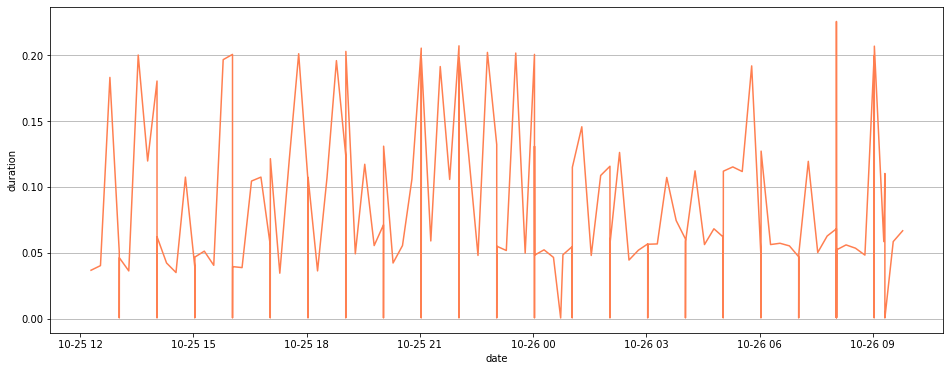

In [118]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=phillips_hue_conn, color="coral")
plt.grid(axis='y')

### Number of bytes against time

Text(0, 0.5, 'Number of bytes')

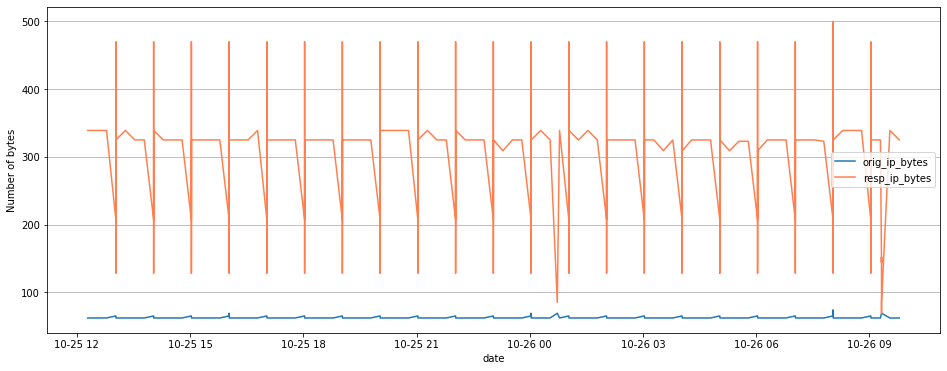

In [119]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=phillips_hue_conn, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=phillips_hue_conn, label='resp_ip_bytes', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

Text(0, 0.5, 'Number of missed bytes')

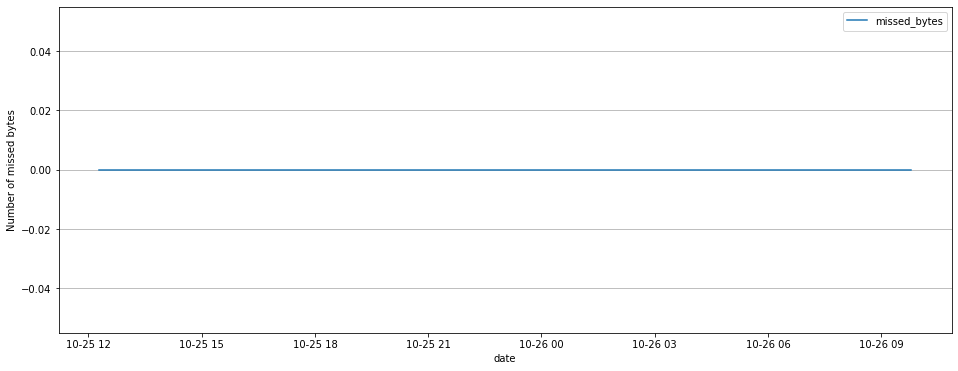

In [120]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="missed_bytes", data=phillips_hue_conn, label='missed_bytes')
plt.grid(axis='y')
plt.ylabel("Number of missed bytes")

### Number of packets against time

Text(0, 0.5, 'Number of packets')

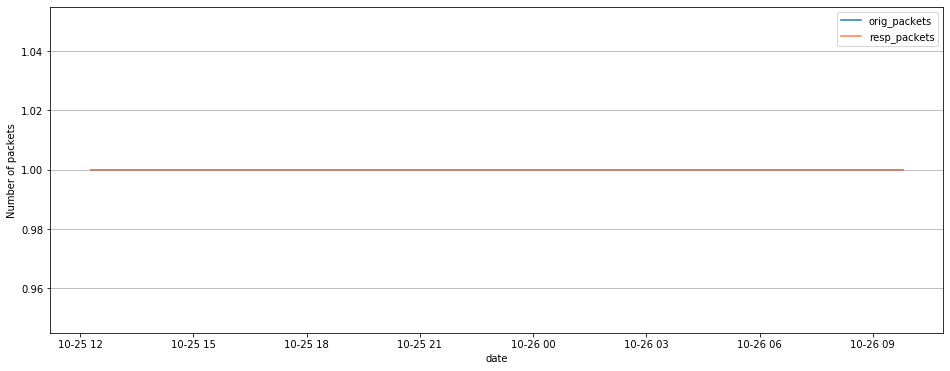

In [122]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=phillips_hue_conn, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=phillips_hue_conn, label='resp_packets', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's packets/sec against bytes/sec

Text(0, 0.5, "Originator's Packets / sec")

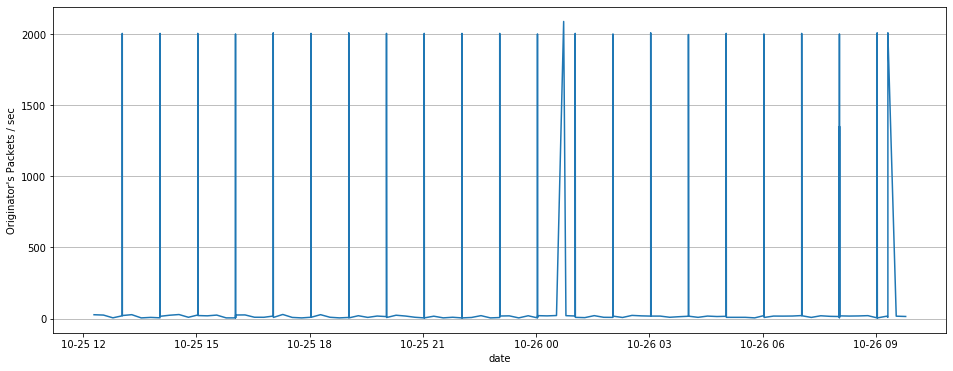

In [123]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=phillips_hue_conn)
plt.grid(axis='y')
plt.ylabel("Originator's Packets / sec")

Text(0, 0.5, "Originator's Bytes / sec")

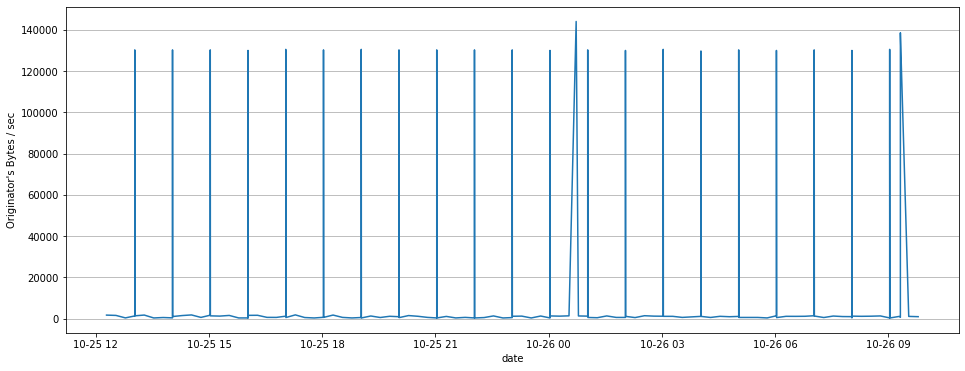

In [125]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=phillips_hue_conn)
plt.grid(axis='y')
plt.ylabel("Originator's Bytes / sec")

### Responder's packets/sec against bytes/sec

Text(0, 0.5, "Responder's Packets / sec")

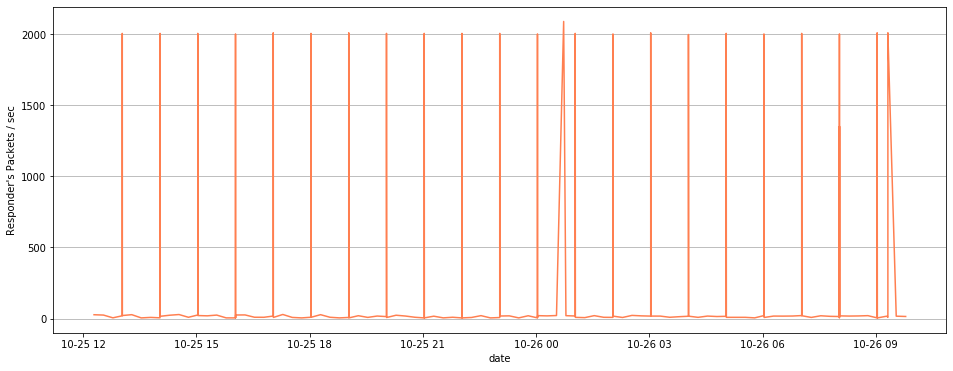

In [128]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_packets_per_s", data=phillips_hue_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Packets / sec")

Text(0, 0.5, "Responder's Bytes / sec")

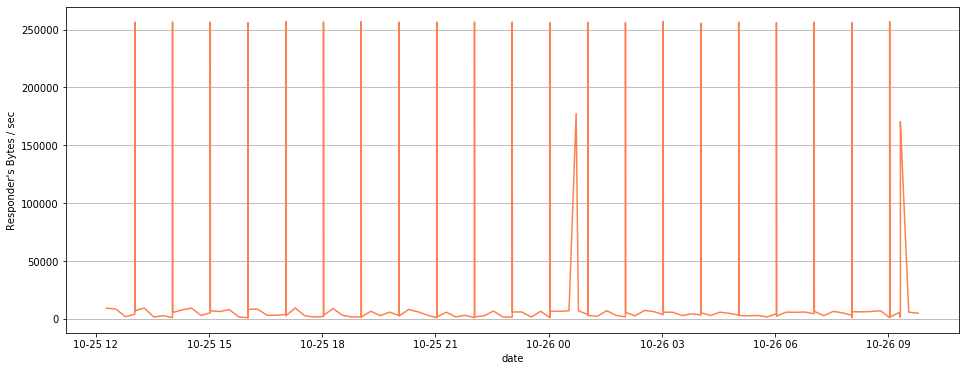

In [129]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_bytes_per_s", data=phillips_hue_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Bytes / sec")

### Packets difference against time

Text(0, 0.5, "Difference between originator's and responder's packets")

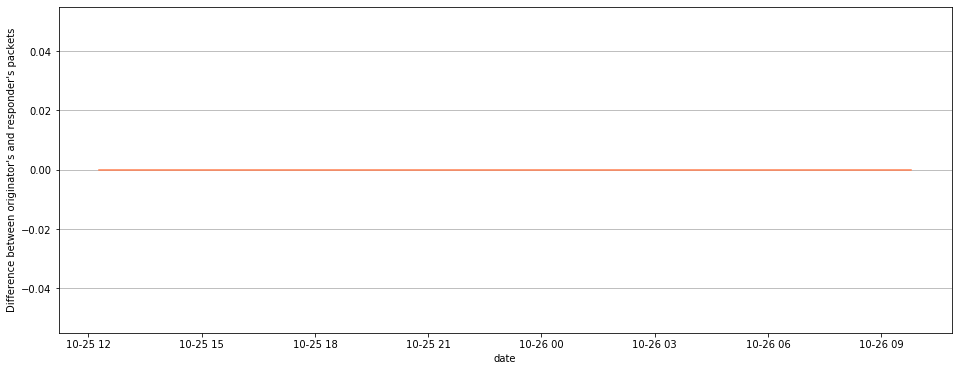

In [131]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_diff", data=phillips_hue_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

### Bytes difference against time

Text(0, 0.5, "Difference between originator's and responder's bytes")

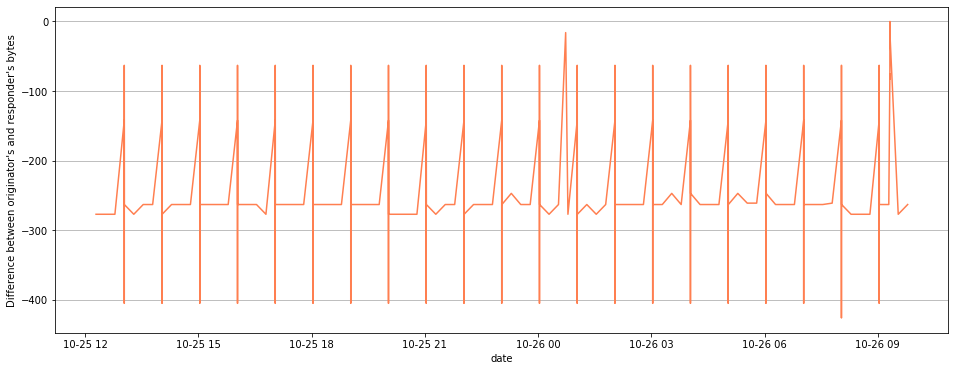

In [138]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_diff", data=phillips_hue_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

### Difference between bytes rates

Text(0, 0.5, "Difference between originator's and responder's bytes/sec")

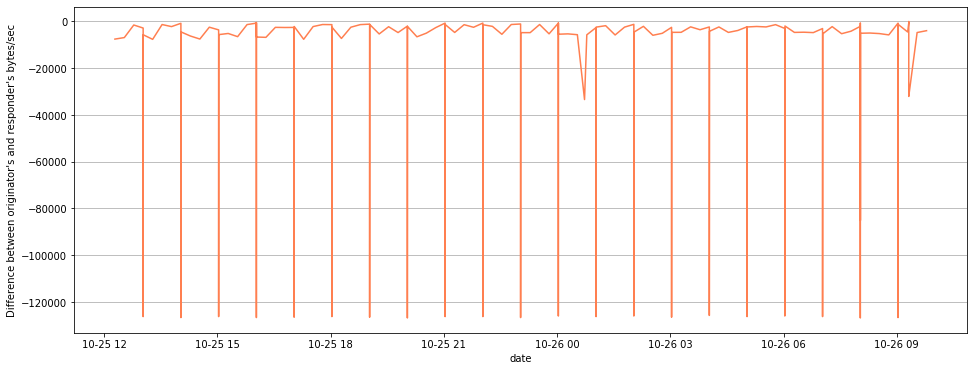

In [139]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_per_s_diff", data=phillips_hue_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes/sec")

### Protocol type distribution

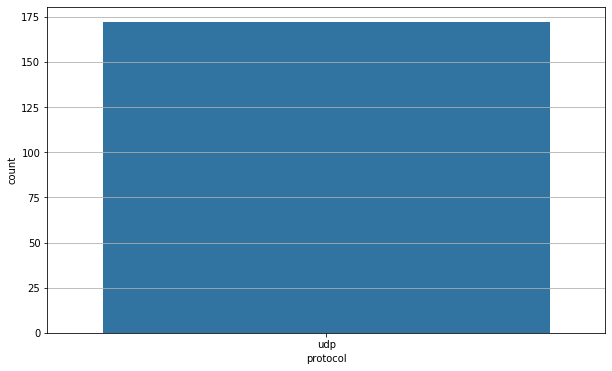

In [141]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=phillips_hue_conn)
plt.grid(axis='y')

## Soomfy Doorlock